# Advanced Regression


### Problem Statement


A US-based housing company named Surprise Housing decided to enter the Australian market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to enter the market. To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house.

### Business Goal

To model the price of houses with the available independent variables which is used by the management to understand how exactly the prices vary with the variables. Accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)

The Libraries are imported wherever neccessary in the code

## Reading and Understanding the Data

In [2]:
shome= pd.read_csv("train.csv")
shome.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
shome.shape

(1460, 81)

There are about 1460 rows and 81 columns.
The count of records is very less in the data set

In [4]:
shome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some of the Null values in the data set. since the record count is less will try to impute the values as much as possible

#### Dropping "Id" because it is basically the index column

In [5]:
shome.drop("Id", axis=1, inplace=True)

###### To find the missing percentage of the each columns

In [6]:
percent_missing = (shome.isnull().sum() / shome.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

In [7]:
shome.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [8]:
shome.PoolQC.isnull().sum().sum()

1453

In [9]:
shome['PoolQC'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

On examining the 'PoolQC' the NA actually means the absence of the feature and not absence of data. There are about 14 columns in the data set which needs to be impute suitable values insteadf of 'NA'

In [10]:
col_with_meaningful_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu","GarageQual", "GarageType","GarageYrBlt", "GarageFinish", "GarageCond", "PoolQC", "Fence", "MiscFeature"]


In [11]:
for col in col_with_meaningful_NA:
    shome[col]=shome[col].fillna("None")

In [12]:
percent_missing = (shome.isnull().sum() / shome.shape[0]*100).sort_values(ascending = False)
percent_missing.head(10)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
dtype: float64

#### LotFrontage: Linear feet of street connected to property

In [13]:
shome.LotFrontage.isnull().sum()

259

In [14]:
shome.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

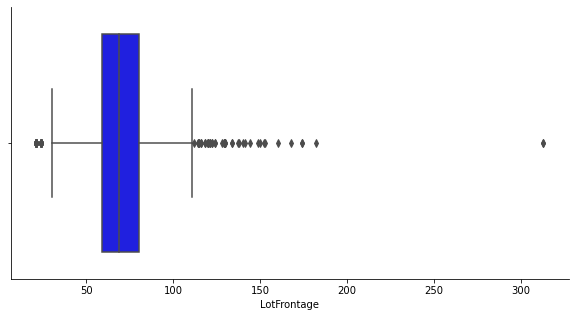

In [15]:
fig = plt.figure(figsize=(10, 5))

sns.boxplot(shome.LotFrontage,color = "Blue")
sns.despine()
plt.show()

In [16]:
shome.drop(['LotFrontage'], axis=1, inplace=True)

##### Many Missing values and more outliers hence dropping the 'LotFrontage' column

#### For the column 'MasVnrArea' only 8 records are missing, will impute the data with Median

In [17]:
shome.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
shome['MasVnrArea'].fillna(shome['MasVnrArea'].median() , inplace=True)

#### For the column 'MasVnrType' & 'Electrical' the missing records imputed with Mode

In [19]:
shome.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
shome.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
shome['MasVnrType'].fillna(shome['MasVnrType'].mode()[0],inplace=True)
shome['Electrical'].fillna(shome['Electrical'].mode()[0],inplace=True)

In [22]:
percent_missing = (shome.isnull().sum() / shome.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(5)

MSSubClass      0.0
KitchenAbvGr    0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
dtype: float64

### There are no missing values in the Dataset now.

## Target Variable 

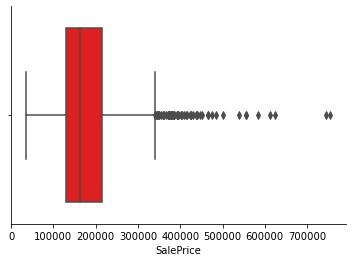

In [23]:
sns.boxplot(shome.SalePrice,color = "red")
sns.despine()
plt.show()

We have lot of outliers in the Target Variable

In [24]:
shome['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Outlier Treatment

In [25]:
Q1=shome['SalePrice'].quantile(0.25)
Q3=shome['SalePrice'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

340037.5
87962.5


Setting the Upperbound value and lowerBound Value for the outlier values

In [26]:
shome['SalePrice']=shome['SalePrice'].apply(lambda x: x if x <= 340037.5 else 340037.5)
shome['SalePrice']=shome['SalePrice'].apply(lambda x: x if x >= 87962.5 else 87962.5)

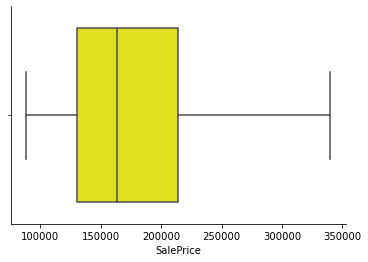

In [27]:
sns.boxplot(shome.SalePrice,color = "yellow")
sns.despine()
plt.show()

ii) Checking target variable

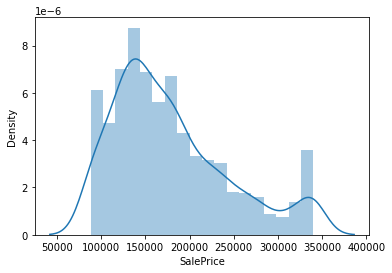

In [28]:
sns.distplot(shome['SalePrice'])
plt.show()

In [29]:
shome['SalePrice'].skew(axis = 0, skipna = True)

0.8889213822099766

Here the target variable is right-skewed which is observed in histogram plot. Skewness will affect model accuracy and performance. So we are applying the log transformation

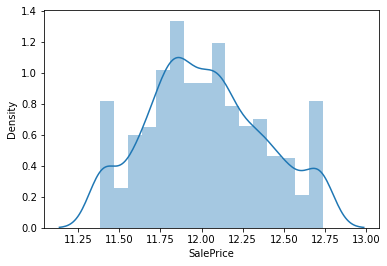

In [30]:
# transforming target variable with log scale
shome['SalePrice'] = np.log(shome['SalePrice'])
sns.distplot(shome['SalePrice'])
plt.show()

In [31]:
shome['SalePrice'].skew(axis = 0, skipna = True)

0.20118868358514141

Now the skeweness is reduce to 0.2

### Changing the Numerical value of the column as per Data dictionary 

In [32]:
shome.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [33]:
shome.MSSubClass = shome.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
shome.MSSubClass.value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

### Converting some of the column from int type to object to treat the variables as categorical variables - as understandable from Data Dictionary

In [34]:
shome['OverallQual'] = shome['OverallQual'].astype('object')
shome['OverallCond'] = shome['OverallCond'].astype('object')
shome['BsmtFullBath'] = shome['BsmtFullBath'].astype('object')
shome['BsmtHalfBath'] = shome['BsmtHalfBath'].astype('object')
shome['FullBath'] = shome['FullBath'].astype('object')
shome['HalfBath'] = shome['HalfBath'].astype('object')
shome['BedroomAbvGr'] = shome['BedroomAbvGr'].astype('object')
shome['KitchenAbvGr'] = shome['KitchenAbvGr'].astype('object')
shome['TotRmsAbvGrd'] = shome['TotRmsAbvGrd'].astype('object')
shome['Fireplaces'] = shome['Fireplaces'].astype('object')
shome['GarageCars'] = shome['GarageCars'].astype('object')

In [35]:
shome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### To find the frequency of unique column in the dataset. if most number of times the same values are present that can be removed.

In [36]:
shome.describe(exclude=np.number).transpose().sort_values(ascending = False,by = 'freq')

,count,unique,top,freq
Utilities,1460,2,AllPub,1459
Street,1460,2,Pave,1454
PoolQC,1460,4,None,1453
Condition2,1460,8,Norm,1445
RoofMatl,1460,8,CompShg,1434
Heating,1460,6,GasA,1428
MiscFeature,1460,5,None,1406
KitchenAbvGr,1460,4,1,1392
LandSlope,1460,3,Gtl,1382
BsmtHalfBath,1460,3,0,1378


In [37]:
shome.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
shome.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
shome.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [40]:
shome.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [41]:
shome.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [42]:
shome.MiscFeature.value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [43]:
shome.PoolQC.value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [44]:
shome.PoolArea.value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

The Column with more than 95% of the unique values is removed from the dataset, Because they will not be used for the accurate prediction.
- PoolQC & PoolArea are realted columns as most of the values on PoolQC is 'No Pool' the area is 0, so it is not used for prediction 

In [45]:
shome.drop(['Utilities','Street','PoolQC','PoolArea','Condition2','RoofMatl','Heating','MiscFeature'], axis=1, inplace=True)

## Derived Columns

### Date Columns

#### The Variable 'WhetherRemodelled'is to derived to check the remodelled house from the 'YearBuilt' and 'YearRemodAdd' column

In [46]:
def Remodel_Check(r):     
    if(r['YearBuilt'] == r['YearRemodAdd']):
        return 0     
    elif (r['YearBuilt'] < r['YearRemodAdd']):
        return 1     
    else:
        return 2    ##Checking purposes
    
shome['WhetherRemodelled'] = shome.apply(Remodel_Check, axis=1)
shome.head()   

,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled
0,2-STORY 1946 & NEWER,RL,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,0,2,2008,WD,Normal,12.247694,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,0,5,2007,WD,Normal,12.109011,0
2,2-STORY 1946 & NEWER,RL,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,0,9,2008,WD,Normal,12.317167,1
3,2-STORY 1945 & OLDER,RL,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,0,2,2006,WD,Abnorml,11.849398,1
4,2-STORY 1946 & NEWER,RL,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,0,12,2008,WD,Normal,12.429216,0


In [47]:
shome.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

In [48]:
shome['WhetherRemodelled'] = shome['WhetherRemodelled'].astype('object')

#### Derive a new variable  'AgeofProperty' to determine the age of property since the built

In [49]:
def find_age(r1):
        return r1['YrSold'] - r1['YearBuilt']
    
shome['AgeofProperty'] = shome.apply(find_age, axis=1)
shome.head()  

,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled,AgeofProperty
0,2-STORY 1946 & NEWER,RL,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,0,2,2008,WD,Normal,12.247694,0,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,0,5,2007,WD,Normal,12.109011,0,31
2,2-STORY 1946 & NEWER,RL,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,0,9,2008,WD,Normal,12.317167,1,7
3,2-STORY 1945 & OLDER,RL,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,0,2,2006,WD,Abnorml,11.849398,1,91
4,2-STORY 1946 & NEWER,RL,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,0,12,2008,WD,Normal,12.429216,0,8


#### Dropping the Date attributes from which the new features were derived. These aren't necessary for analysis.


In [50]:
shome = shome.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
shome.head()

,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled,AgeofProperty
0,2-STORY 1946 & NEWER,RL,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,0,2,WD,Normal,12.247694,0,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,0,5,WD,Normal,12.109011,0,31
2,2-STORY 1946 & NEWER,RL,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,0,9,WD,Normal,12.317167,1,7
3,2-STORY 1945 & OLDER,RL,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,0,2,WD,Abnorml,11.849398,1,91
4,2-STORY 1946 & NEWER,RL,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,0,12,WD,Normal,12.429216,0,8


In [51]:
shome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   object 
 1   MSZoning           1460 non-null   object 
 2   LotArea            1460 non-null   int64  
 3   Alley              1460 non-null   object 
 4   LotShape           1460 non-null   object 
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   LandSlope          1460 non-null   object 
 8   Neighborhood       1460 non-null   object 
 9   Condition1         1460 non-null   object 
 10  BldgType           1460 non-null   object 
 11  HouseStyle         1460 non-null   object 
 12  OverallQual        1460 non-null   object 
 13  OverallCond        1460 non-null   object 
 14  RoofStyle          1460 non-null   object 
 15  Exterior1st        1460 non-null   object 
 16  Exterior2nd        1460 

### Outlier Treatment of Numerical variable

In [52]:
Numerical_columns=['LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 
                   'GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','MoSold','AgeofProperty']

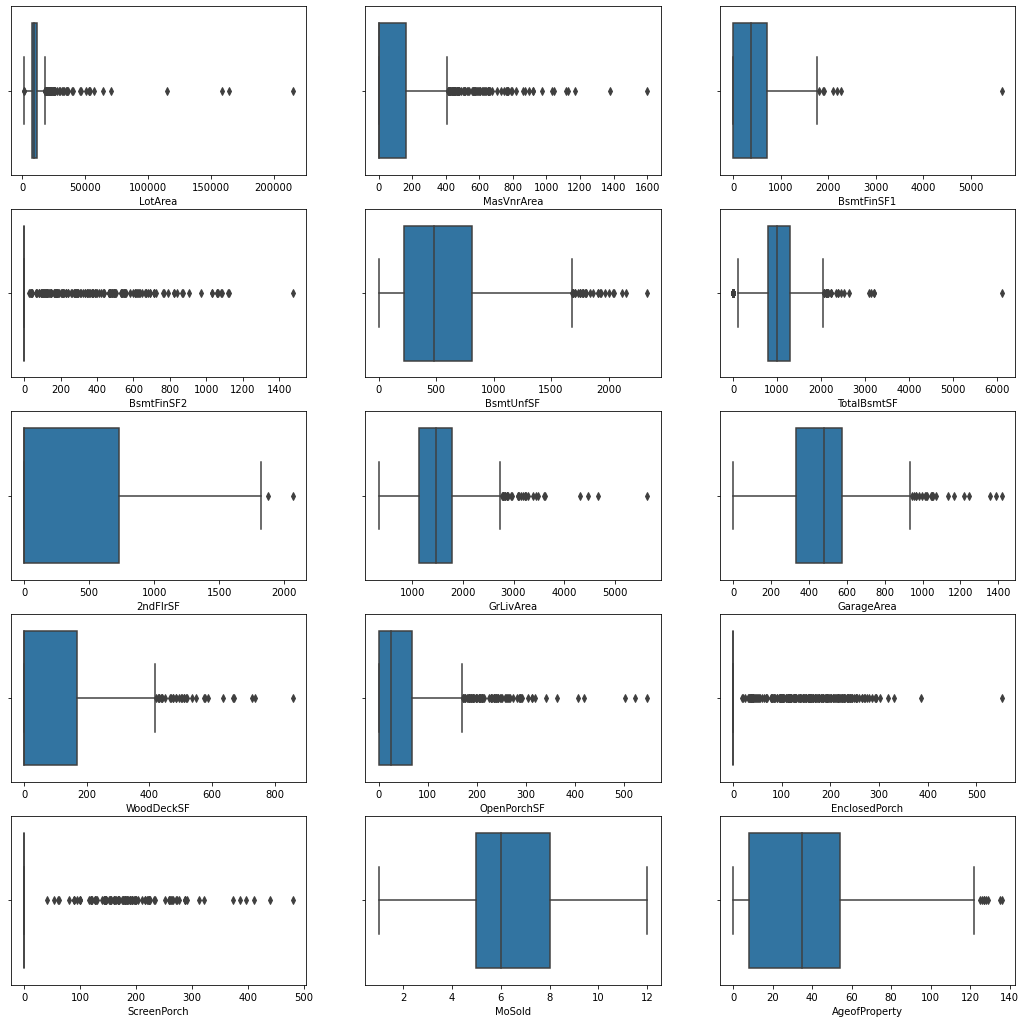

In [53]:
#plotting outlier
plt.figure(figsize = (18,18) )
for i in enumerate(Numerical_columns):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(x = i[1], data= shome)

In [54]:
Q1=shome['LotArea'].quantile(0.25)
Q3=shome['LotArea'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['LotArea']=shome['LotArea'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['LotArea']=shome['LotArea'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [55]:
Q1=shome['MasVnrArea'].quantile(0.25)
Q3=shome['MasVnrArea'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['MasVnrArea']=shome['MasVnrArea'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['MasVnrArea']=shome['MasVnrArea'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [56]:
Q1=shome['OpenPorchSF'].quantile(0.25)
Q3=shome['OpenPorchSF'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['OpenPorchSF']=shome['OpenPorchSF'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['OpenPorchSF']=shome['OpenPorchSF'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [57]:
Q1=shome['GrLivArea'].quantile(0.25)
Q3=shome['GrLivArea'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['GrLivArea']=shome['GrLivArea'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['GrLivArea']=shome['GrLivArea'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [58]:
Q1=shome['TotalBsmtSF'].quantile(0.25)
Q3=shome['TotalBsmtSF'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['TotalBsmtSF']=shome['TotalBsmtSF'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['TotalBsmtSF']=shome['TotalBsmtSF'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [59]:
Q1=shome['WoodDeckSF'].quantile(0.25)
Q3=shome['WoodDeckSF'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['WoodDeckSF']=shome['WoodDeckSF'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['WoodDeckSF']=shome['WoodDeckSF'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [60]:
Q1=shome['GarageArea'].quantile(0.25)
Q3=shome['GarageArea'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['GarageArea']=shome['GarageArea'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['GarageArea']=shome['GarageArea'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [61]:
Q1=shome['TotalBsmtSF'].quantile(0.25)
Q3=shome['TotalBsmtSF'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['TotalBsmtSF']=shome['TotalBsmtSF'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['TotalBsmtSF']=shome['TotalBsmtSF'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [62]:
Q1=shome['BsmtUnfSF'].quantile(0.25)
Q3=shome['BsmtUnfSF'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['BsmtUnfSF']=shome['BsmtUnfSF'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['BsmtUnfSF']=shome['BsmtUnfSF'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [63]:
Q1=shome['BsmtFinSF1'].quantile(0.25)
Q3=shome['BsmtFinSF1'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['BsmtFinSF1']=shome['BsmtFinSF1'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['BsmtFinSF1']=shome['BsmtFinSF1'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [64]:
Q1=shome['AgeofProperty'].quantile(0.25)
Q3=shome['AgeofProperty'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['AgeofProperty']=shome['AgeofProperty'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['AgeofProperty']=shome['AgeofProperty'].apply(lambda x: x if x >= lower_bound else lower_bound)

In [65]:
Q1=shome['EnclosedPorch'].quantile(0.25)
Q3=shome['EnclosedPorch'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
lower_bound=Q3 - 1.5 * IQR
shome['EnclosedPorch']=shome['EnclosedPorch'].apply(lambda x: x if x <= upper_bound else upper_bound)
shome['EnclosedPorch']=shome['EnclosedPorch'].apply(lambda x: x if x >= lower_bound else lower_bound)

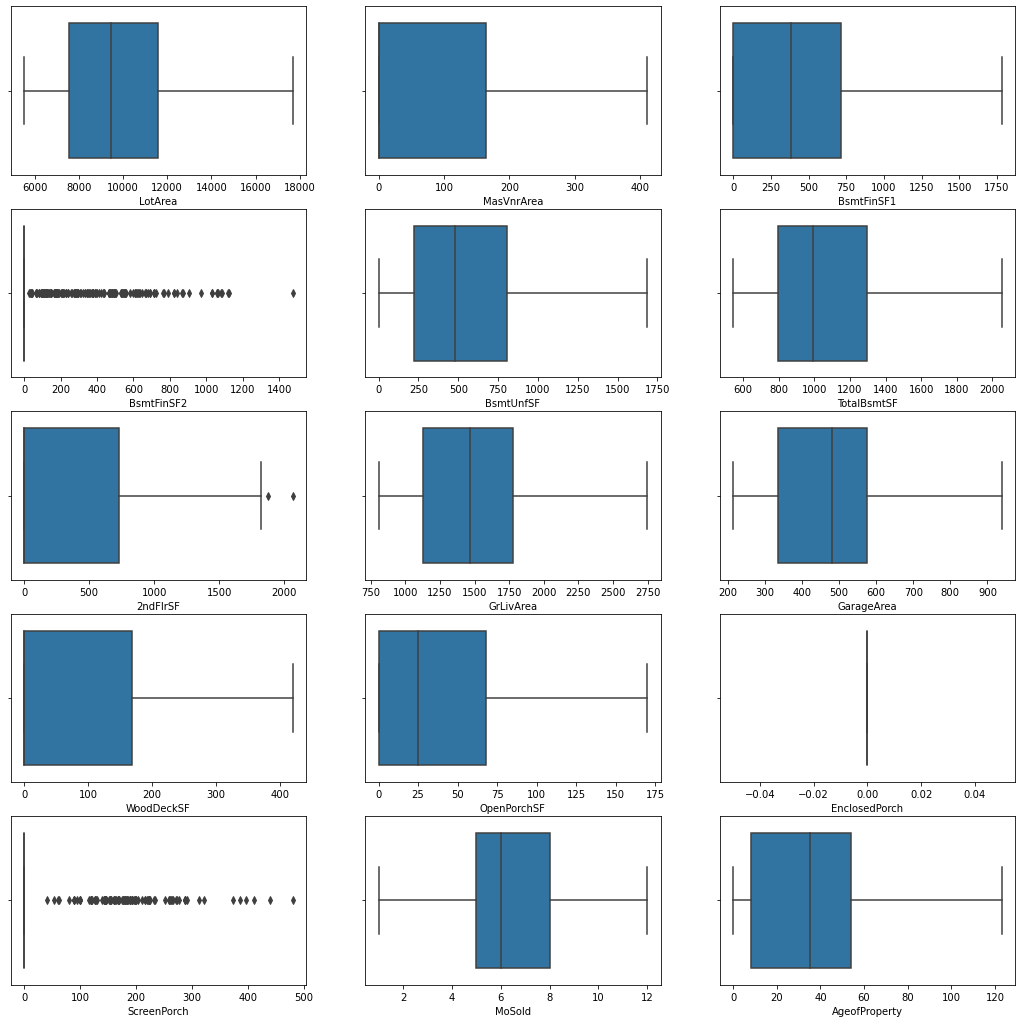

In [66]:
#plotting outlier
plt.figure(figsize = (18,18) )
for i in enumerate(Numerical_columns):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(x = i[1], data= shome)

### HeatMap

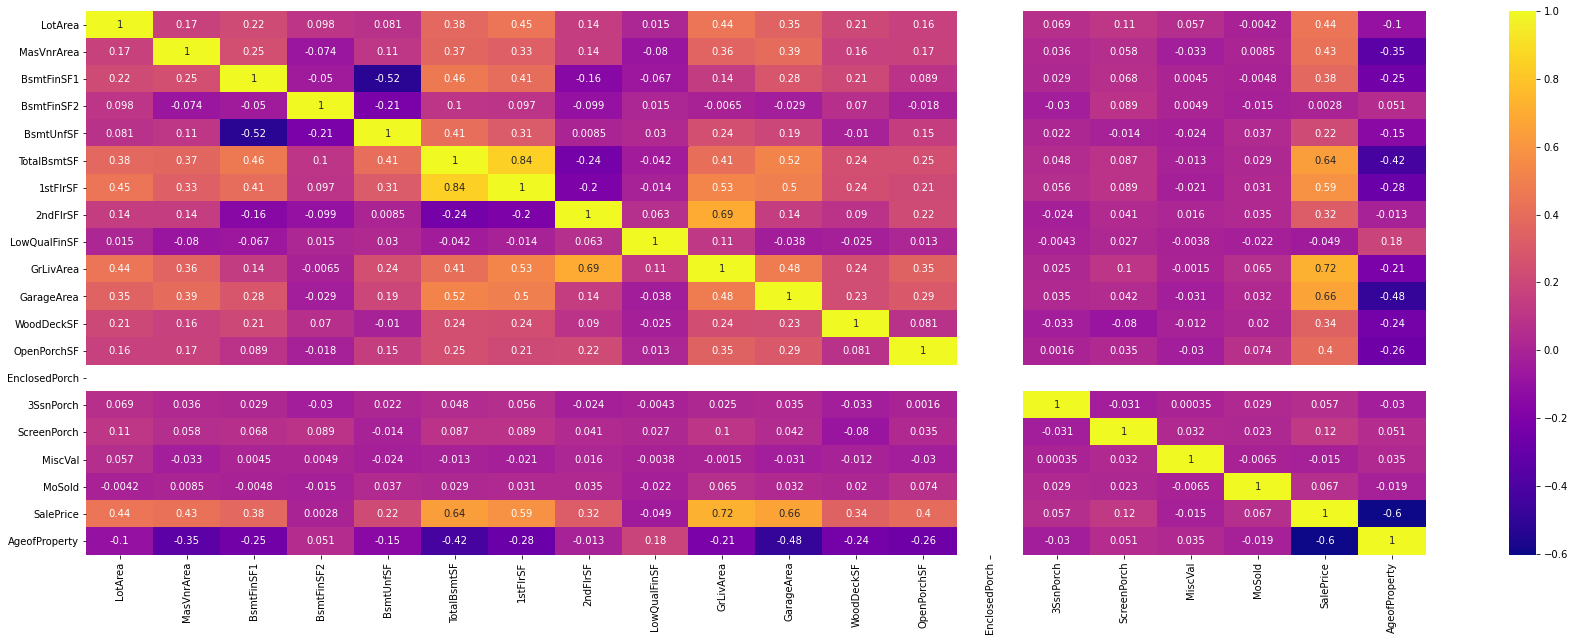

In [67]:
plt.figure(figsize = (30, 10))
sns.heatmap(shome.corr(), annot = True, cmap = "plasma")
plt.show()

In [68]:
cat= shome.select_dtypes(include=['object'])
print(list(cat.columns.values))

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'WhetherRemodelled']


In [69]:
cat1=['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 
      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
      'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
      'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
      'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
      'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'WhetherRemodelled']

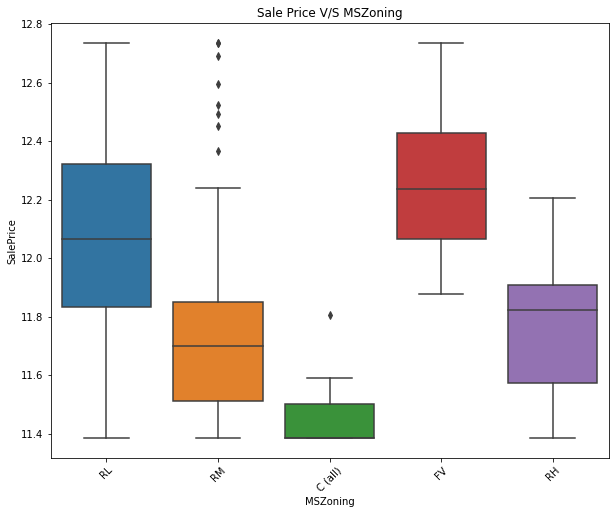

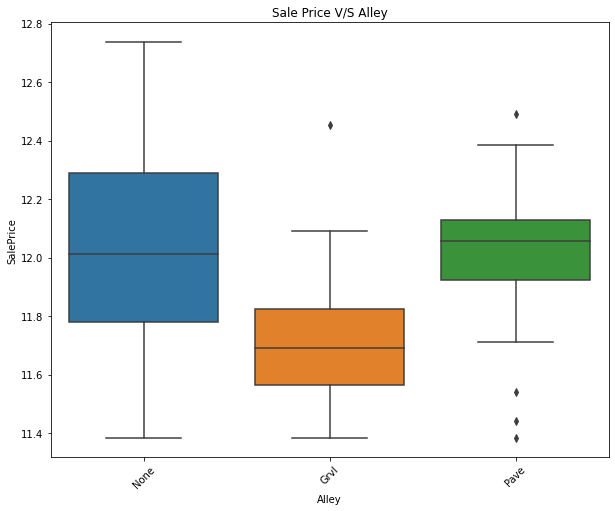

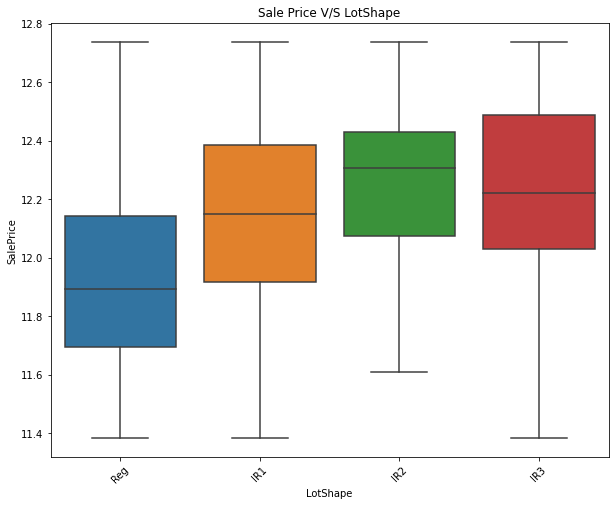

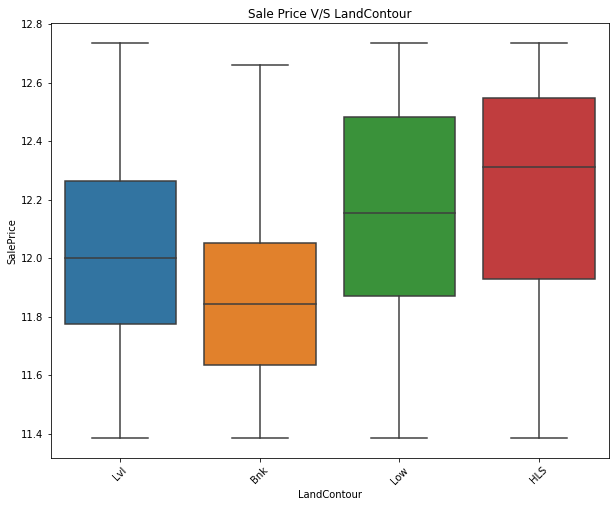

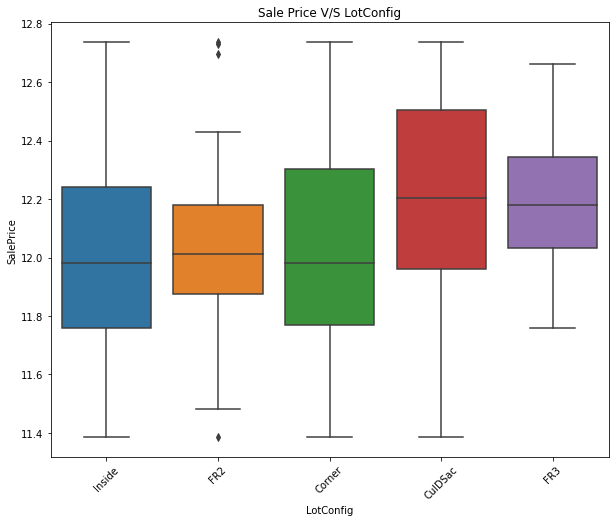

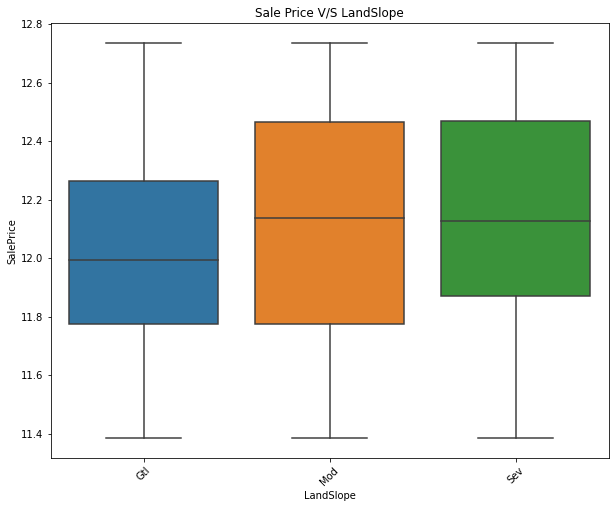

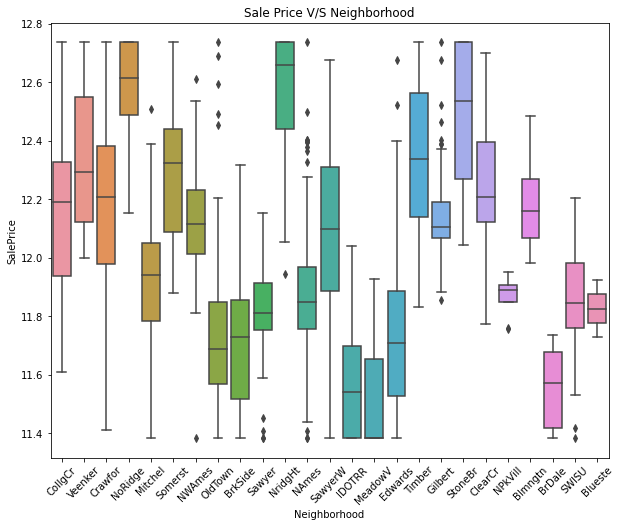

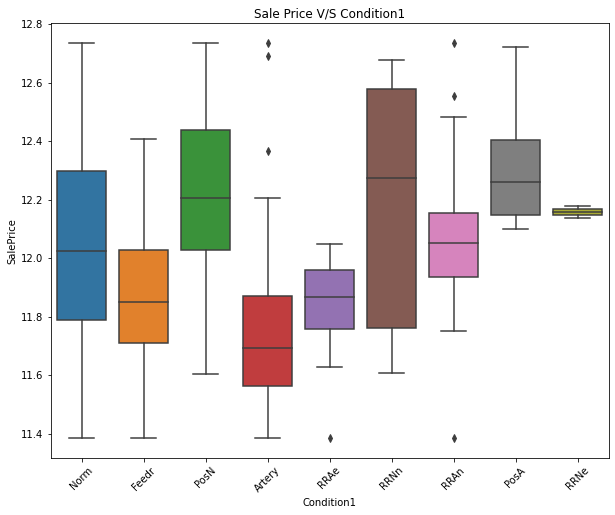

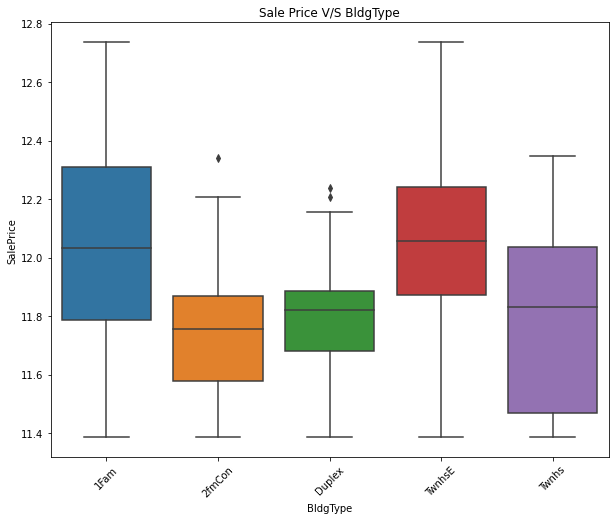

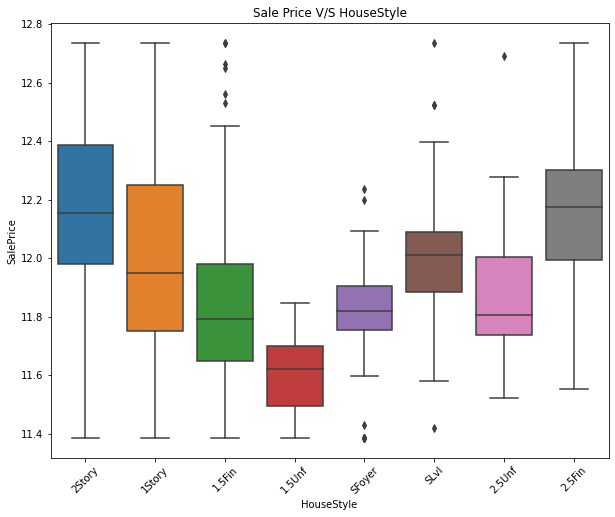

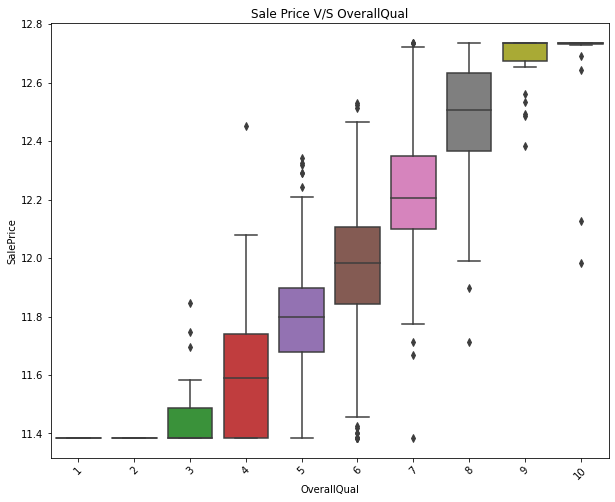

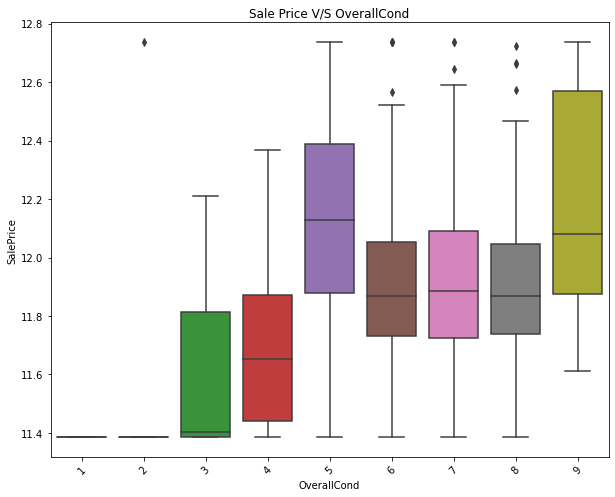

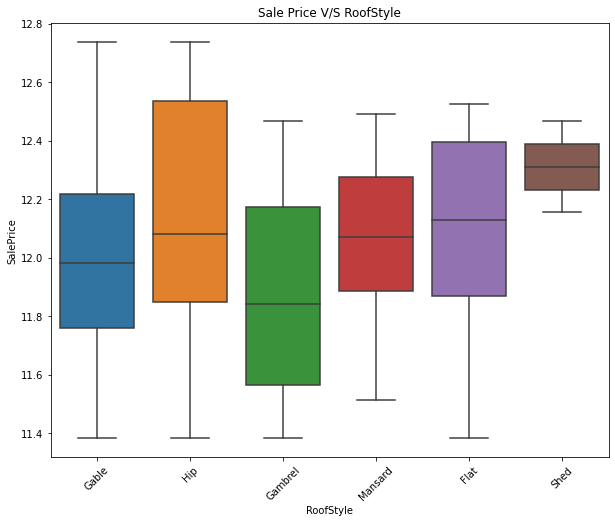

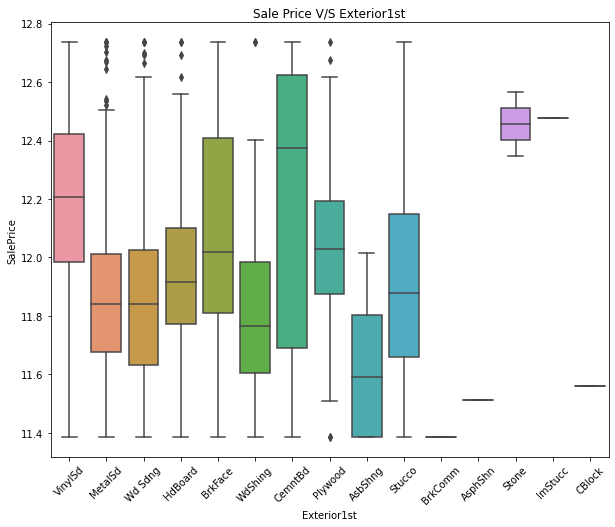

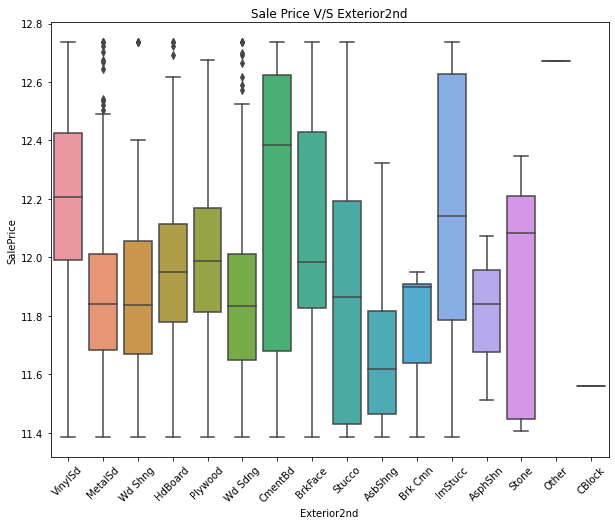

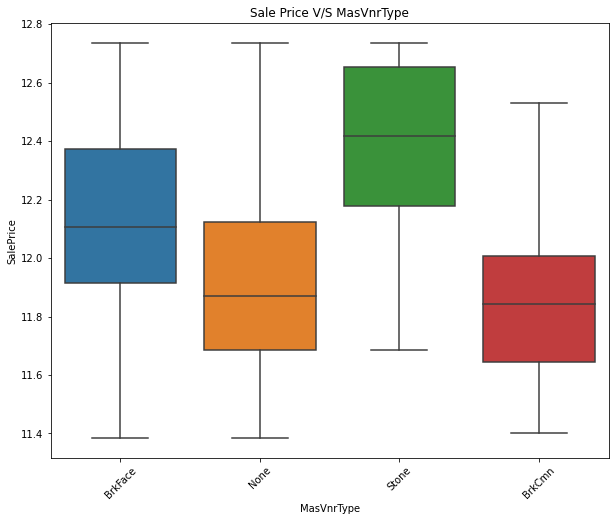

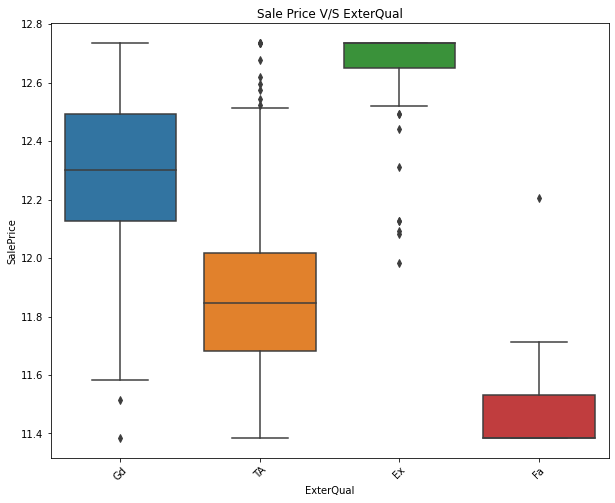

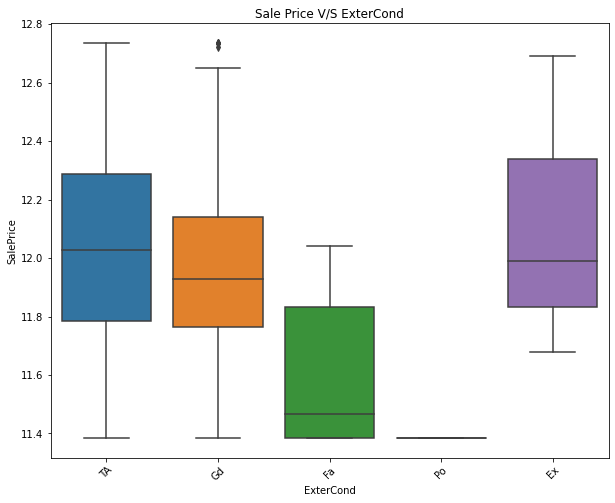

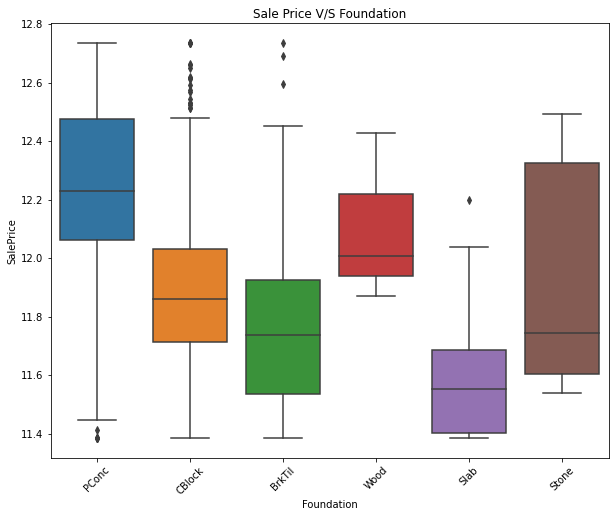

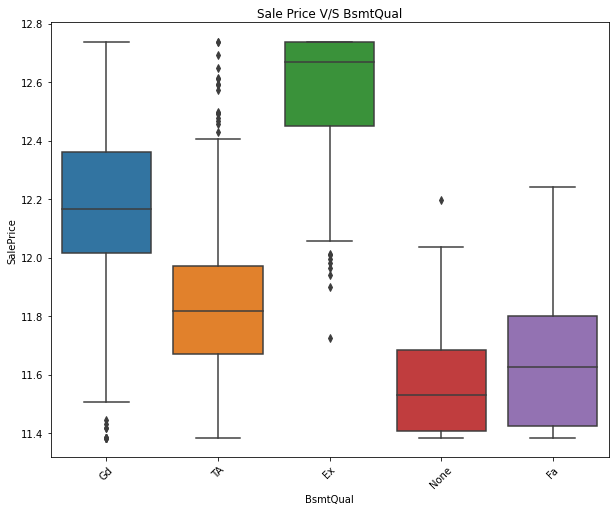

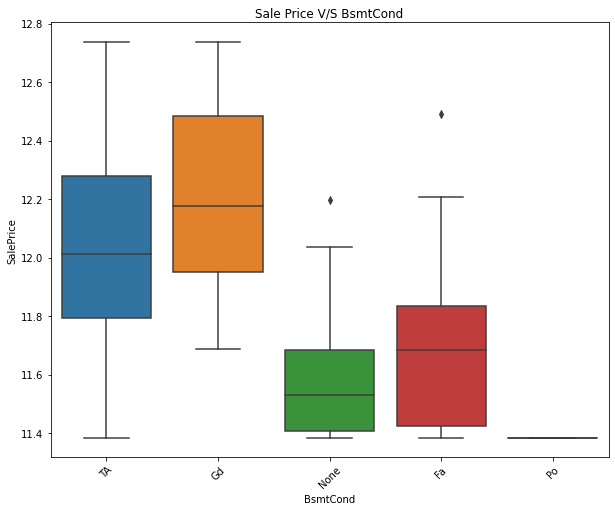

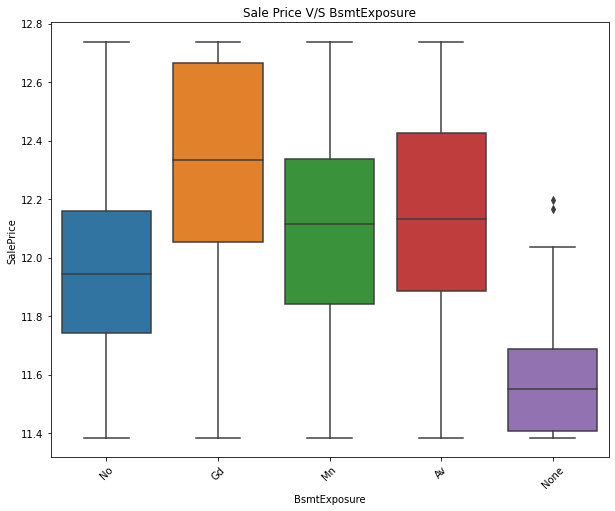

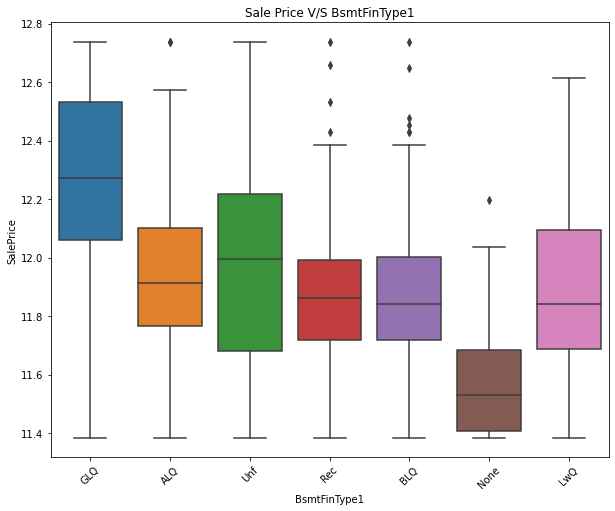

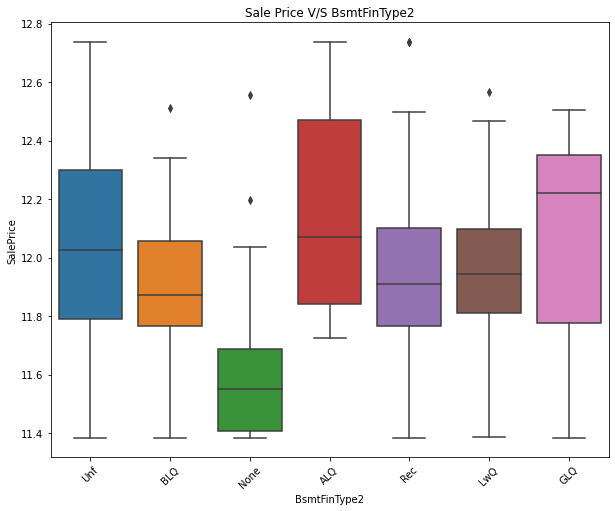

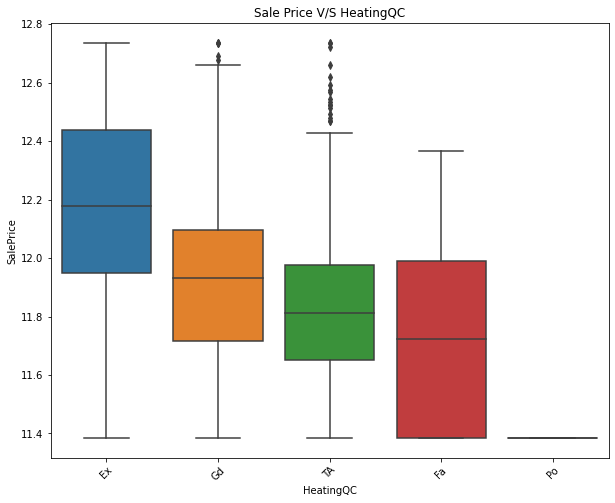

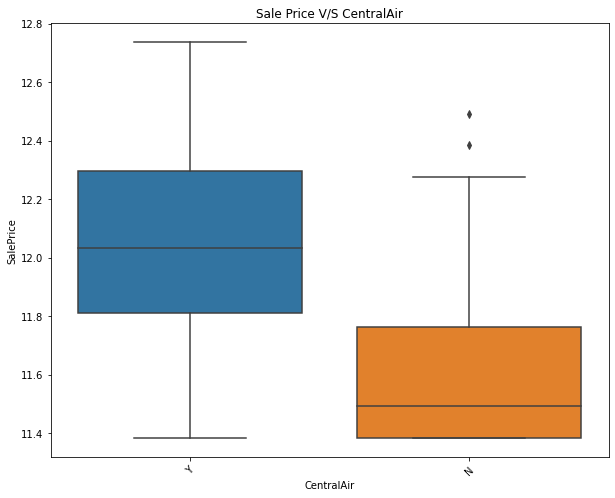

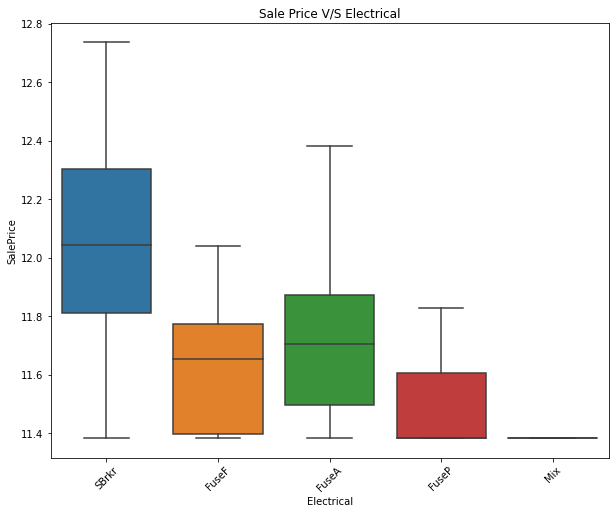

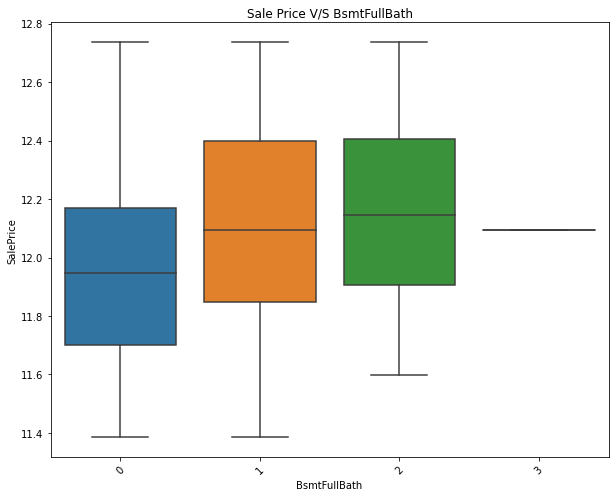

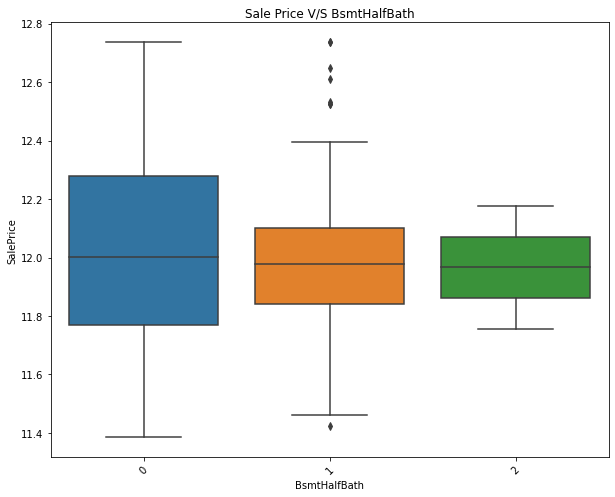

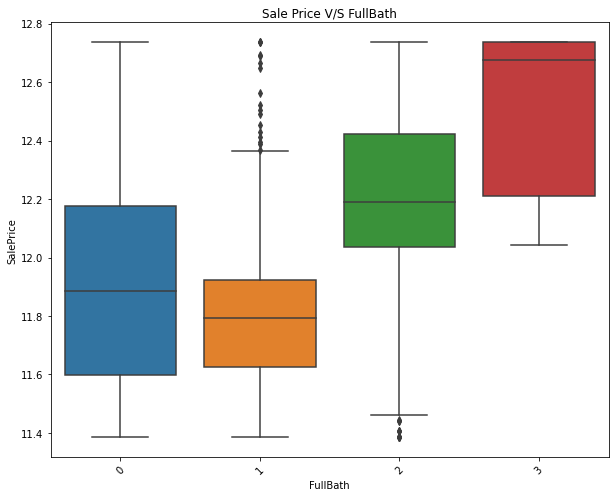

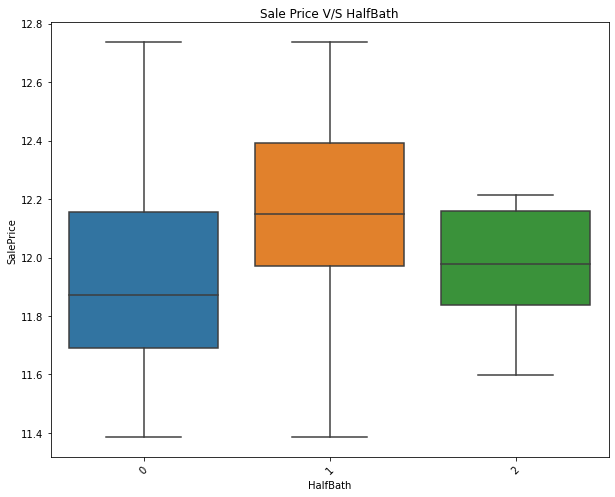

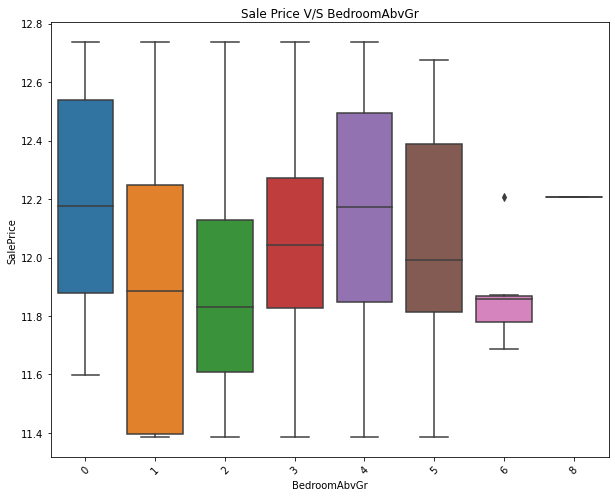

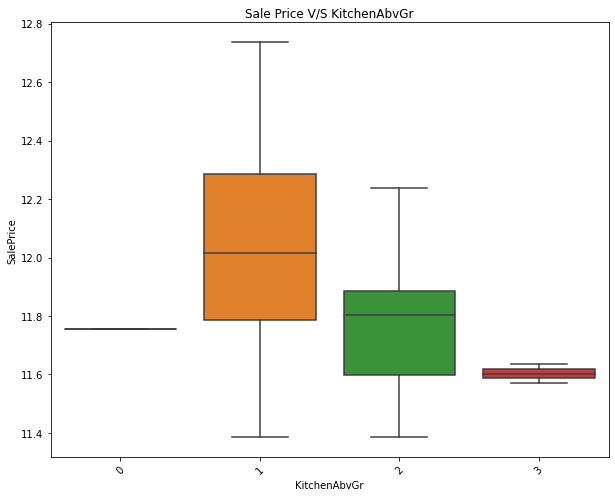

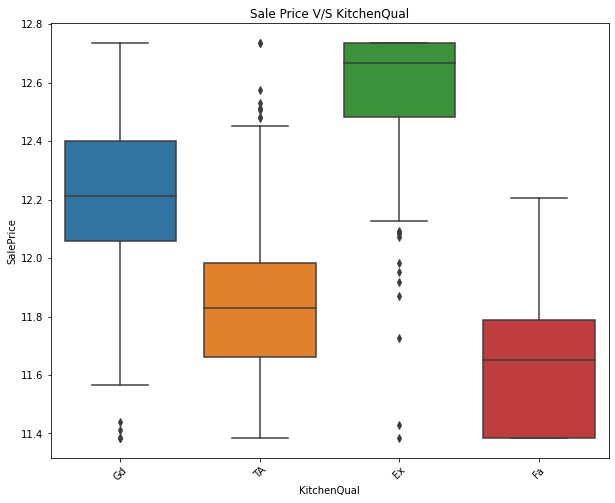

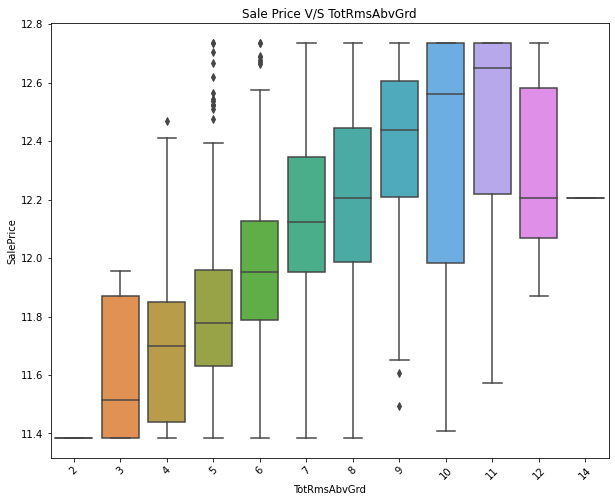

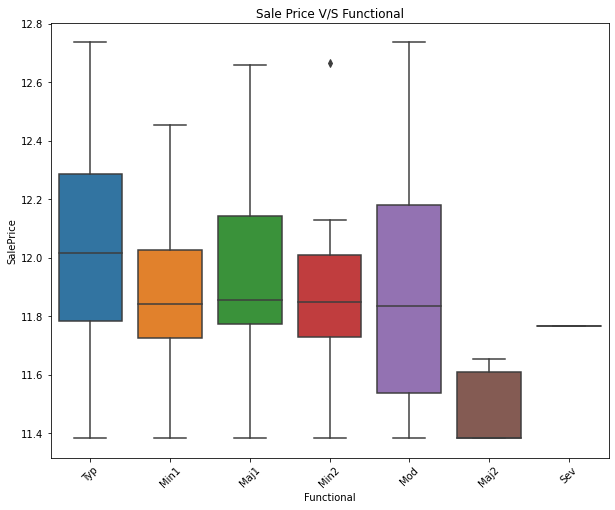

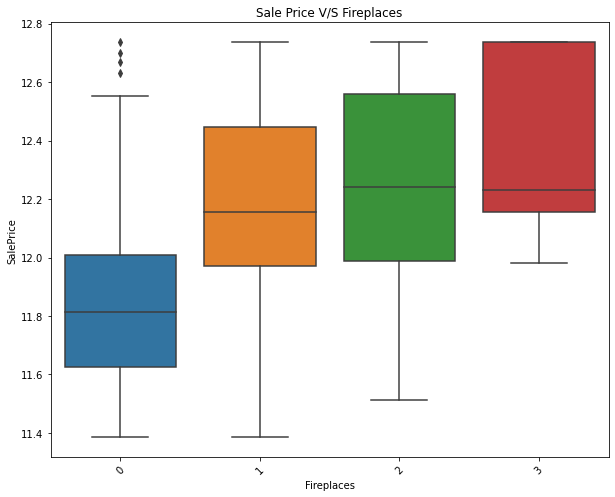

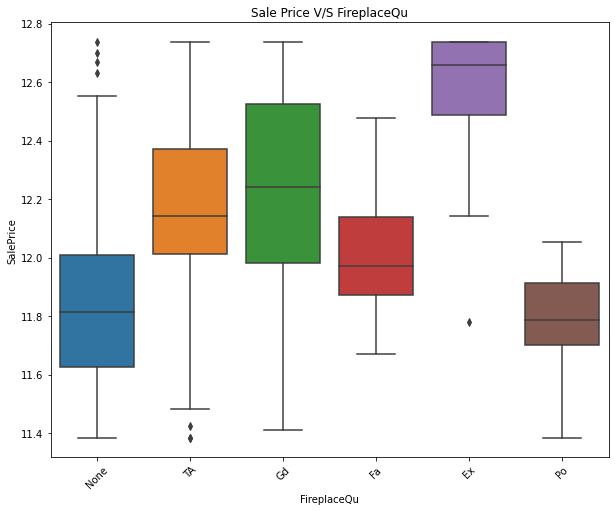

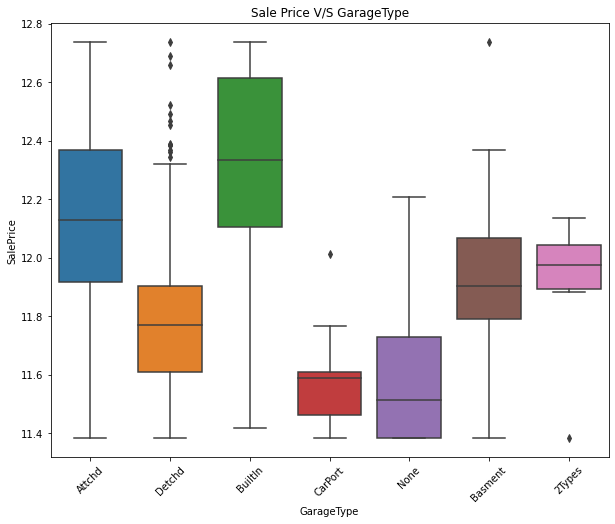

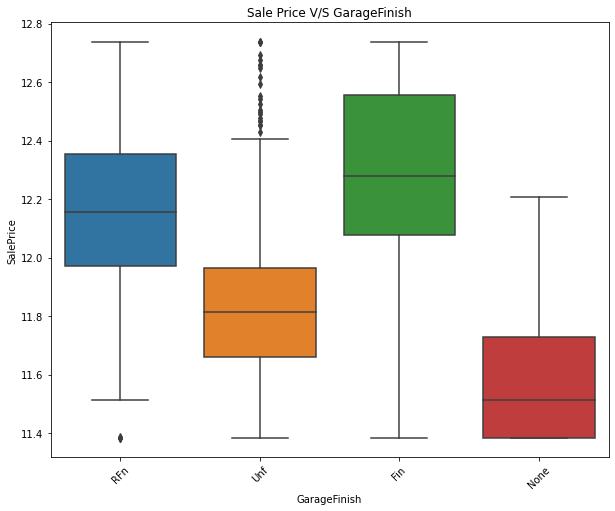

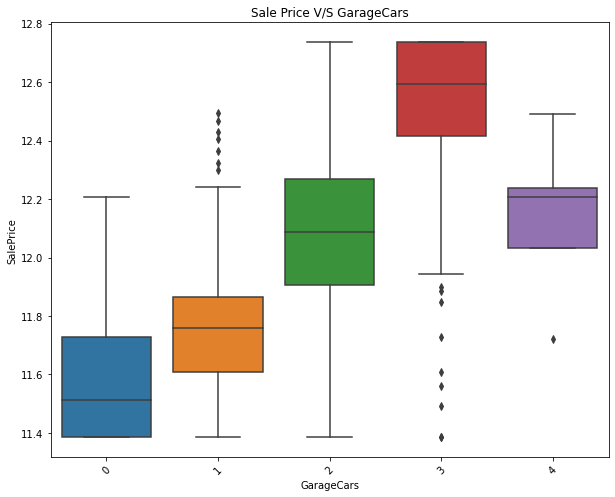

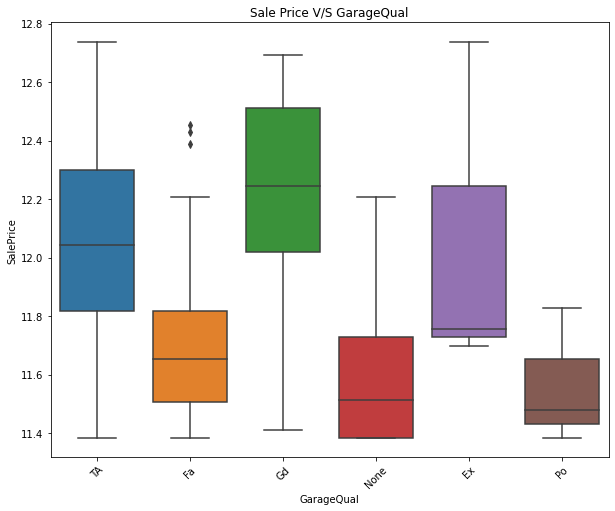

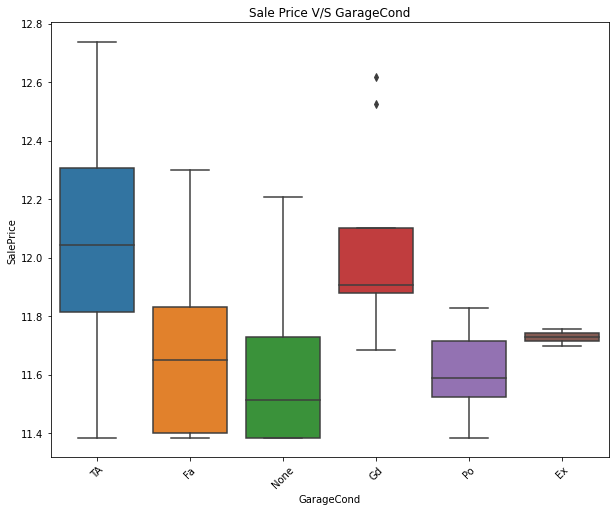

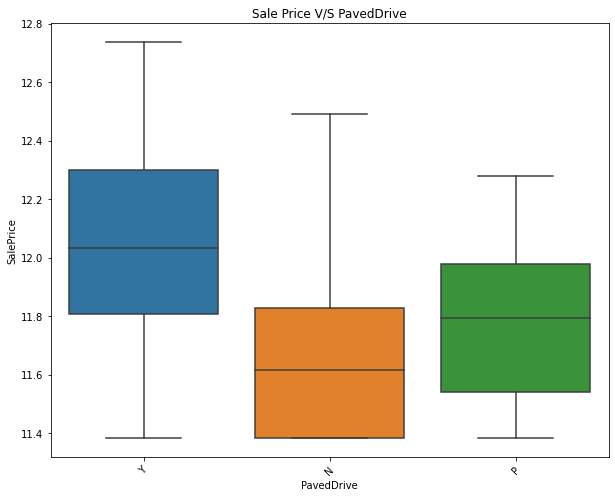

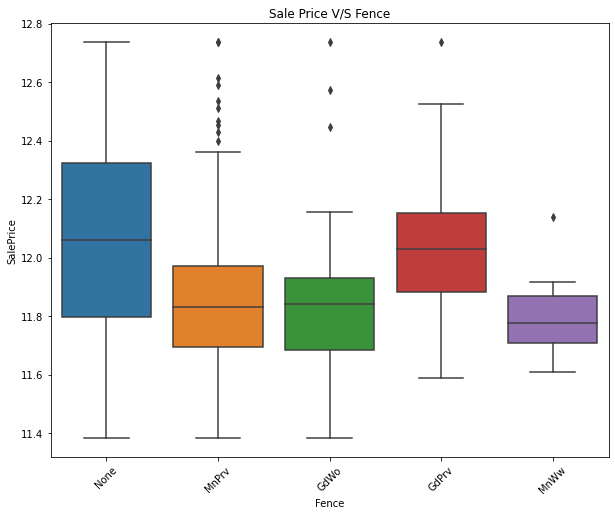

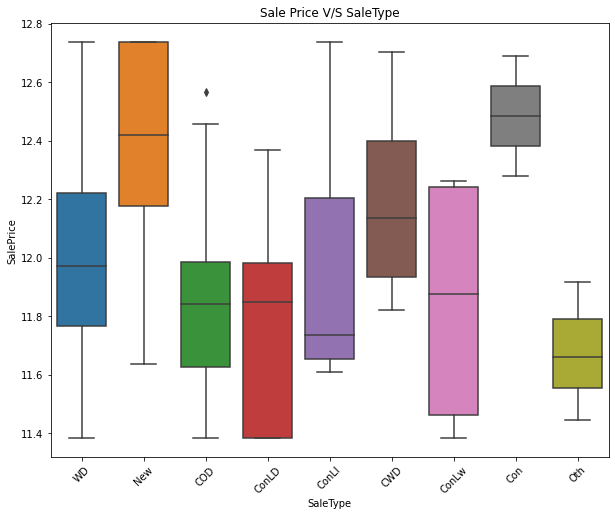

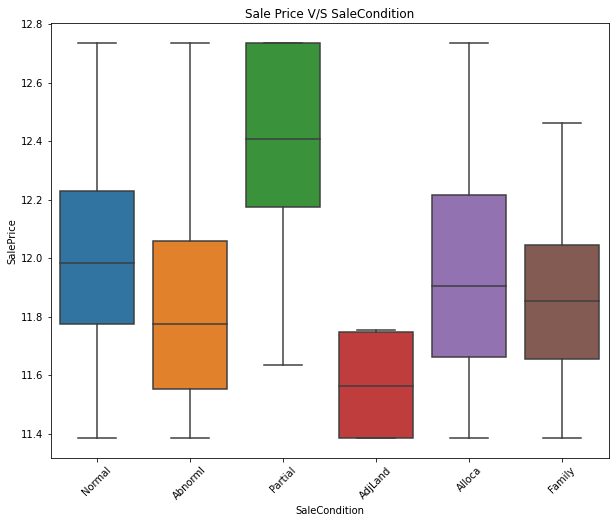

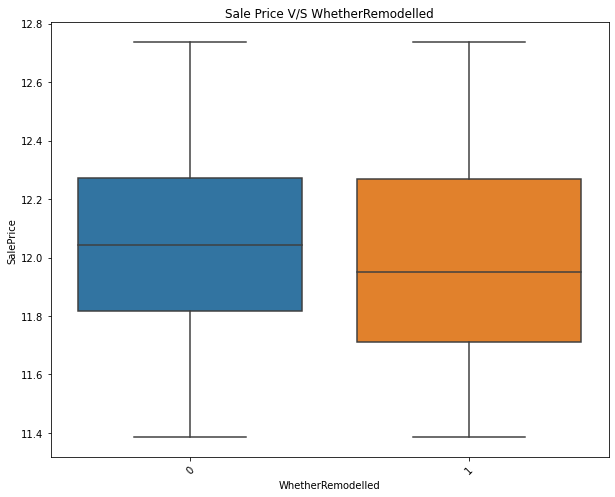

In [70]:
for col in cat1:
    plt.figure(figsize=[10,8])
    plt.title("Sale Price V/S {}".format(col), size=12)
    sns.boxplot(shome[col], shome['SalePrice'])
    plt.xticks(rotation=45)
    plt.show()

The box plot between all the categorical value and 'Target Variable' very less outlier among the data, the plot almost seems normal

In [71]:
num= shome.select_dtypes(include=['int64','float64'])

print(list(num.columns.values))

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'AgeofProperty']


In [72]:
num1=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
      'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 
        'AgeofProperty']

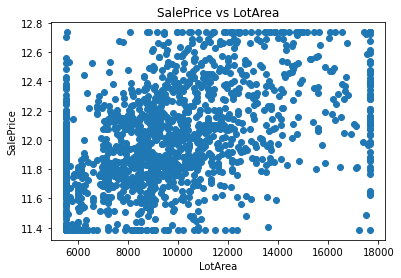

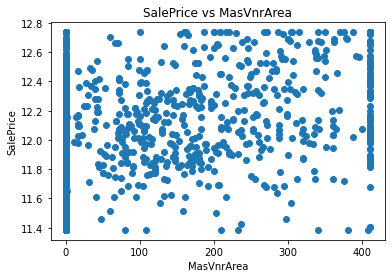

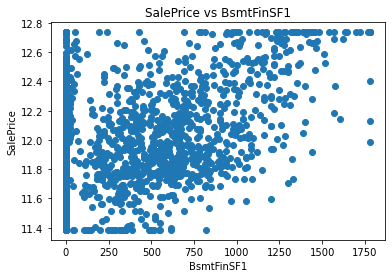

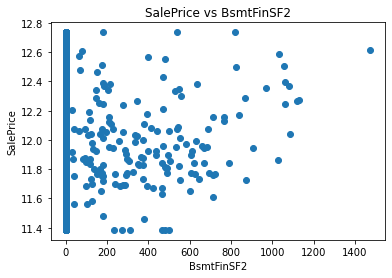

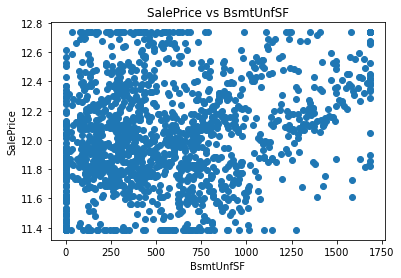

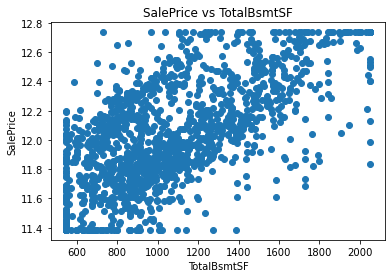

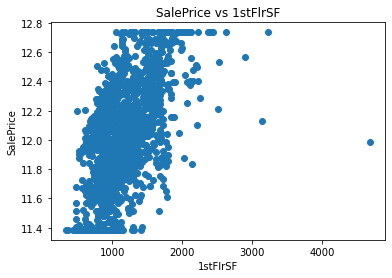

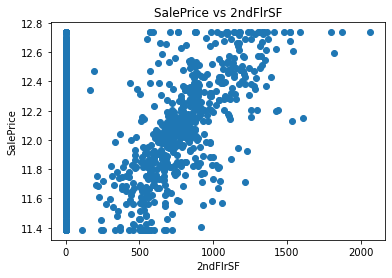

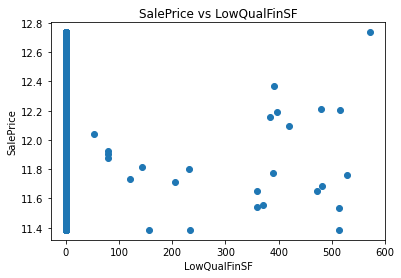

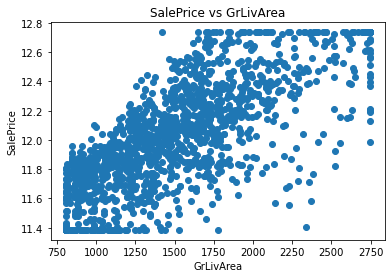

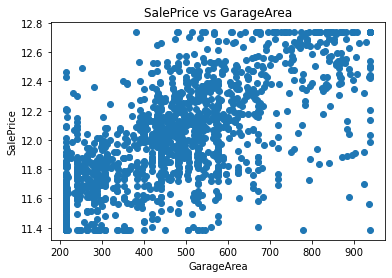

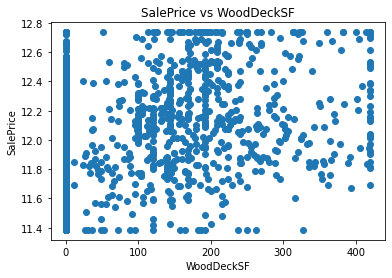

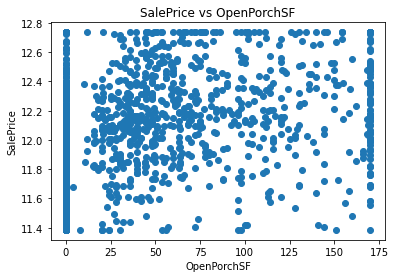

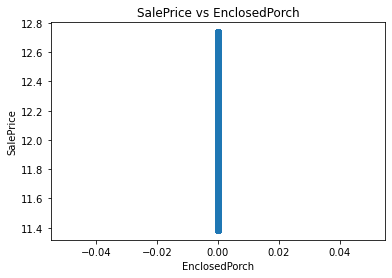

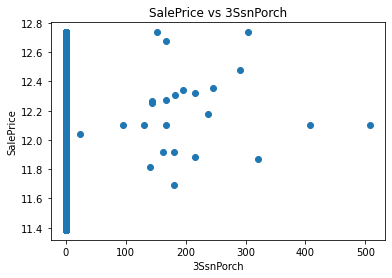

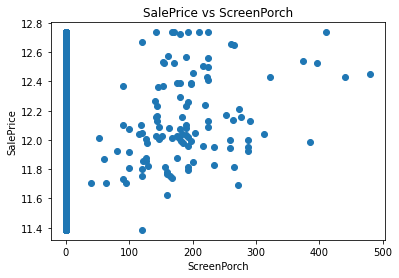

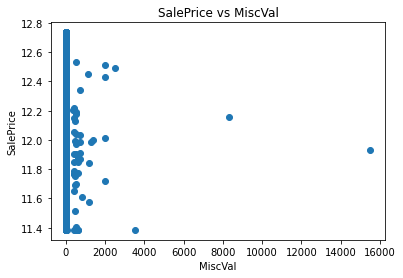

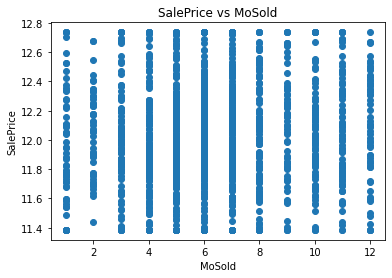

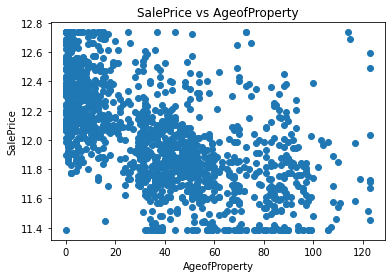

In [73]:
#for numerical variables
for ncol in num1:

    figure = plt.figure()
    ax = plt.gca()
    ax.scatter(shome[ncol],shome['SalePrice'])
    ax.set_xlabel(ncol)
    ax.set_ylabel('SalePrice')
    ax.set_title("{} vs {}".format('SalePrice', ncol))

    plt.show()

In [74]:
shome.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [75]:
shome['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64

In [76]:
shome.LowQualFinSF.value_counts()

0      1434
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479       1
473       1
420       1
397       1
390       1
53        1
384       1
371       1
234       1
232       1
205       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64

In [77]:
shome.drop(['MiscVal','3SsnPorch','LowQualFinSF'], axis=1, inplace=True)

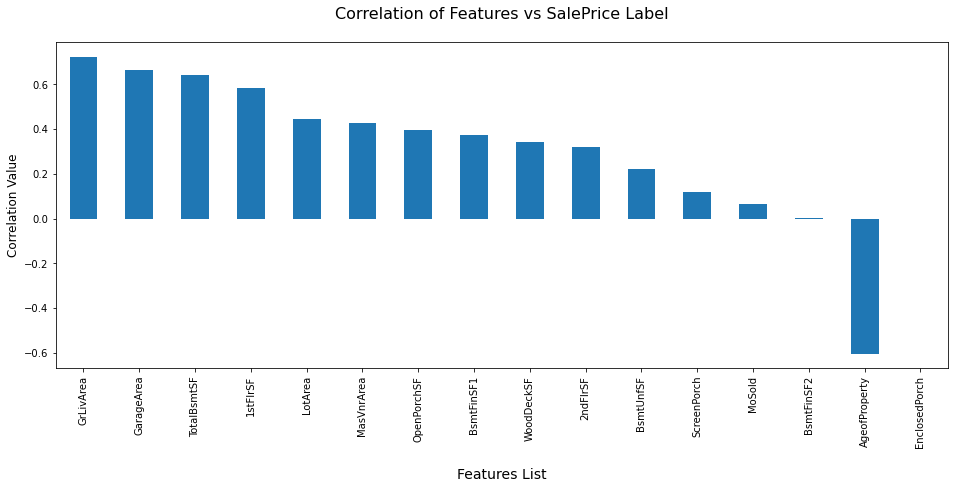

In [78]:
shome_corr = shome.corr()
plt.figure(figsize=(16,6))
shome_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

### To Find Multicollinearity Among the independent variables

In [79]:
corr=shome.corr()

In [80]:
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.75).any()

raw = corr.loc[m, m]

In [81]:
raw

,TotalBsmtSF,1stFlrSF
TotalBsmtSF,1.000000,0.844741
1stFlrSF,0.844741,1.000000


- TotalBsmtSF and 1stFlrSF has high Co-relation

Dropping one of the high Co-related Variables.

In [82]:
shome.drop(['1stFlrSF'], axis=1, inplace=True)

### Creating Dummy Variables

In [83]:
# subset all categorical variables
Dummy_Cat = shome.select_dtypes(include=['object'])
print(list(cat.columns.values))

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'WhetherRemodelled']


In [84]:
RemoveCat=['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
           'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
           'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
           'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition',
           'WhetherRemodelled']

In [85]:
# Creating Dummies
dummy = pd.get_dummies(shome[RemoveCat],drop_first=True)

In [86]:
shome = pd.concat([shome.drop(RemoveCat,axis=1),dummy],axis=1)

In [87]:
shome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 281 entries, LotArea to WhetherRemodelled_1
dtypes: float64(12), int64(4), uint8(265)
memory usage: 560.5 KB


The Dummy Variables are created for all the Categorical variables.

### Dividing into Train and Test sets for the model building

In [88]:
from sklearn.model_selection import train_test_split

X = shome.drop('SalePrice',axis=1)
Y = shome['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

In [89]:
X_test.shape

(438, 280)

In [90]:
X_train.shape

(1022, 280)

## scaling

In [91]:
num2= shome.select_dtypes(include=['int64','float64'])

print(list(num2.columns.values))

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'SalePrice', 'AgeofProperty']


In [92]:
Numerical_columns=['LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 
                   'GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','MoSold','AgeofProperty']

#### Using StandardScaler for scaling columns

In [93]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X_train[Numerical_columns] = scaler.fit_transform(X_train[Numerical_columns])
X_test[Numerical_columns] = scaler.transform(X_test[Numerical_columns])

## Lasso Regression

In [94]:
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [95]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_LR = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_LR.fit(X_train,Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

### Result of lasso regression

In [96]:
cv_results = pd.DataFrame(model_LR.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054342,0.036538,0.003150,0.006299,0.0001,{'alpha': 0.0001},0.921354,0.886801,0.898335,0.930107,0.935686,0.914456,0.018804,2,0.958614,0.962643,0.962541,0.956441,0.956568,0.959362,0.002748
1,0.017090,0.000470,0.003140,0.006280,0.001,{'alpha': 0.001},0.925799,0.885778,0.901891,0.928313,0.934026,0.915161,0.018338,1,0.931731,0.937354,0.937211,0.931763,0.929944,0.933601,0.003078
2,0.006688,0.008191,0.003797,0.006076,0.01,{'alpha': 0.01},0.865888,0.808797,0.821313,0.853796,0.874752,0.844909,0.025575,3,0.846550,0.860643,0.854854,0.849055,0.844567,0.851134,0.005877
3,0.013623,0.006841,0.000207,0.000414,0.05,{'alpha': 0.05},0.777605,0.752953,0.758444,0.754603,0.785403,0.765802,0.013177,4,0.763297,0.779360,0.777172,0.770014,0.758728,0.769714,0.007882
4,0.017309,0.000501,0.000000,0.000000,0.1,{'alpha': 0.1},0.662812,0.655482,0.668379,0.639920,0.664327,0.658184,0.010040,5,0.656921,0.666754,0.670636,0.667624,0.651527,0.662692,0.007237
5,0.010124,0.008291,0.003540,0.006591,0.2,{'alpha': 0.2},0.229362,0.226511,0.257837,0.225718,0.217568,0.231399,0.013788,6,0.238915,0.229987,0.247319,0.263297,0.222925,0.240488,0.014058
6,0.010036,0.008194,0.003340,0.006679,0.3,{'alpha': 0.3},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.010276,0.008395,0.000000,0.000000,0.4,{'alpha': 0.4},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.003736,0.006522,0.006496,0.007558,0.5,{'alpha': 0.5},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.012739,0.006482,0.000797,0.000746,0.6,{'alpha': 0.6},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### R2 Score Vs Alpha of Test And Train Set

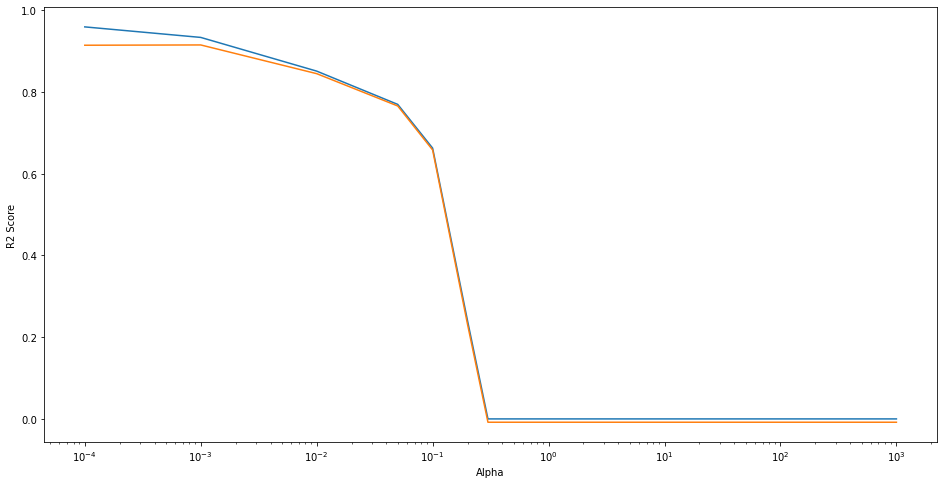

In [97]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [98]:
model_LR.best_params_

{'alpha': 0.001}

In [99]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#building the model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,Y_train)
Y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

### calculation of metrics such as R2 score, RSS and RMSE for Lasso

In [100]:
metric1 = []
r2_train_lr = r2_score(Y_train, Y_train_pred)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_test_pred)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - Y_train_pred))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - Y_test_pred))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, Y_train_pred)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_test_pred)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9312635909257756
0.8931393176023712
8.962307194593539
5.8971571494812025
0.00876938081662773
0.013463829108404572


Text(0.5, 0, 'Errors')

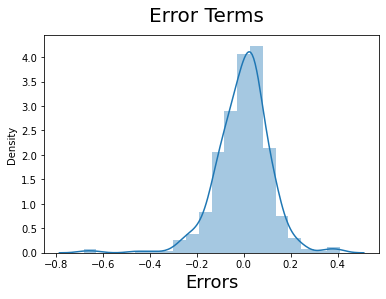

In [101]:
fig = plt.figure()
sns.distplot((Y_test - Y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

Most of the values are populated at the centre (zero error) , looks fine.

Text(0.5, 0, 'Errors')

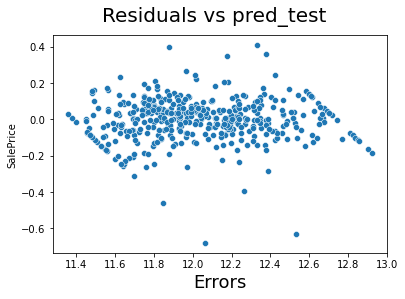

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(Y_test_pred,(Y_test - Y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

The residuals are scattered around '0'

In [103]:
#Coeff of Lasso
lasso.coef_

array([ 0.0166288 ,  0.        ,  0.02247899,  0.00395798, -0.00250929,
        0.04770824,  0.00688065,  0.11957544,  0.03087932,  0.01077289,
        0.00636501,  0.        ,  0.00498659,  0.        , -0.06616417,
       -0.        , -0.00033957,  0.00705182,  0.        , -0.        ,
        0.        ,  0.        ,  0.02722547, -0.        , -0.03577201,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.03552702, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.02352085, -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.01032176,
        0.03756732, -0.        ,  0.0982674 , -0.0498177 ,  0.        ,
       -0.        , -0.03650927, -0.        , -0.00400901,  0.        ,
       -0.        , -0.        ,  0.03324835, -0.        ,  0.        ,
       -0.00279166, -0.        ,  0.06654366,  0.        ,  0.  

In [104]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("The number of feautures selected by lasso :",var_selected)

The number of feautures selected by lasso : 75


#### Lasso model parameters

In [105]:
# lasso model parameters
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [106]:
lasso_coef['Coef']=lasso_coef['Coef'].apply(lambda x:abs(x))

In [107]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,11.735334
98,OverallQual_9,0.165797
97,OverallQual_8,0.120873
8,GrLivArea,0.119575
53,Neighborhood_Crawfor,0.098267
207,KitchenAbvGr_1,0.083417
107,OverallCond_9,0.076442
68,Neighborhood_Somerst,0.066544
15,AgeofProperty,0.066164
96,OverallQual_7,0.060098


In [108]:
lasso_coef.drop([0], axis=0, inplace=True)

The top 10 features of Lasso

In [109]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
98,OverallQual_9,0.165797
97,OverallQual_8,0.120873
8,GrLivArea,0.119575
53,Neighborhood_Crawfor,0.098267
207,KitchenAbvGr_1,0.083417
107,OverallCond_9,0.076442
68,Neighborhood_Somerst,0.066544
15,AgeofProperty,0.066164
96,OverallQual_7,0.060098
102,OverallCond_4,0.055123


## Ridge Regression

In [110]:
#defining the model
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Ridge()

model_RR = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_RR.fit(X_train,Y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

### Result of Ridge regression

In [111]:
cv_result_r = pd.DataFrame(model_RR.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007658,0.003318,0.003566,0.005152,0.0001,{'alpha': 0.0001},0.891177,0.901947,0.888364,0.841734,0.913305,0.918649,0.940245,0.924639,0.863875,0.915541,0.899948,0.028125,25,0.961849,0.960200,0.961455,0.964672,0.960257,0.959978,0.959316,0.960487,0.962273,0.960493,0.961098,0.001467
1,0.009552,0.007765,0.001802,0.005405,0.0010,{'alpha': 0.001},0.891216,0.901992,0.888704,0.841783,0.913493,0.918915,0.940305,0.924661,0.863963,0.915604,0.900064,0.028129,24,0.961849,0.960200,0.961455,0.964672,0.960257,0.959977,0.959315,0.960487,0.962273,0.960493,0.961098,0.001467
2,0.010478,0.008385,0.002008,0.004993,0.0100,{'alpha': 0.01},0.891602,0.902447,0.891385,0.842242,0.914932,0.920905,0.940685,0.924865,0.864770,0.916194,0.901003,0.028131,23,0.961846,0.960198,0.961447,0.964669,0.960253,0.959965,0.959311,0.960484,0.962272,0.960490,0.961093,0.001468
3,0.006684,0.008187,0.003366,0.006745,0.0500,{'alpha': 0.05},0.893189,0.904412,0.896868,0.843918,0.918272,0.924463,0.941223,0.925561,0.867445,0.918276,0.903363,0.027905,22,0.961806,0.960157,0.961363,0.964622,0.960205,0.959863,0.959257,0.960440,0.962240,0.960440,0.961039,0.001474
4,0.008562,0.008580,0.003559,0.006869,0.1000,{'alpha': 0.1},0.894890,0.906481,0.899659,0.845606,0.920728,0.926147,0.941555,0.926184,0.869856,0.920116,0.905122,0.027575,21,0.961723,0.960069,0.961241,0.964530,0.960112,0.959732,0.959159,0.960349,0.962165,0.960338,0.960942,0.001479
5,0.010321,0.008244,0.001778,0.005010,0.2000,{'alpha': 0.2},0.897630,0.909501,0.902175,0.848312,0.923928,0.927817,0.942073,0.927025,0.873265,0.922504,0.907423,0.026999,19,0.961513,0.959845,0.960989,0.964302,0.959877,0.959471,0.958928,0.960119,0.961960,0.960084,0.960709,0.001486
6,0.008296,0.007512,0.000413,0.001240,0.3000,{'alpha': 0.3},0.899794,0.911587,0.903417,0.850470,0.926085,0.928838,0.942489,0.927581,0.875642,0.924007,0.908991,0.026530,18,0.961281,0.959602,0.960743,0.964054,0.959620,0.959215,0.958681,0.959868,0.961725,0.959814,0.960460,0.001490
7,0.010816,0.008232,0.000643,0.001259,0.4000,{'alpha': 0.4},0.901574,0.913131,0.904186,0.852262,0.927695,0.929609,0.942825,0.927977,0.877408,0.925046,0.910171,0.026144,17,0.961042,0.959360,0.960506,0.963804,0.959361,0.958966,0.958433,0.959616,0.961484,0.959548,0.960212,0.001492
8,0.010946,0.007587,0.004158,0.006740,0.5000,{'alpha': 0.5},0.903076,0.914335,0.904724,0.853789,0.928966,0.930242,0.943095,0.928274,0.878771,0.925810,0.911108,0.025818,16,0.960804,0.959123,0.960279,0.963557,0.959108,0.958726,0.958189,0.959369,0.961244,0.959291,0.959969,0.001493
9,0.007393,0.008166,0.003571,0.006145,0.6000,{'alpha': 0.6},0.904364,0.915310,0.905130,0.855112,0.930009,0.930785,0.943310,0.928500,0.879850,0.926395,0.911877,0.025540,15,0.960569,0.958893,0.960062,0.963316,0.958863,0.958494,0.957950,0.959129,0.961009,0.959044,0.959733,0.001493


#### R2 Score Vs Alpha of Test And Train Set

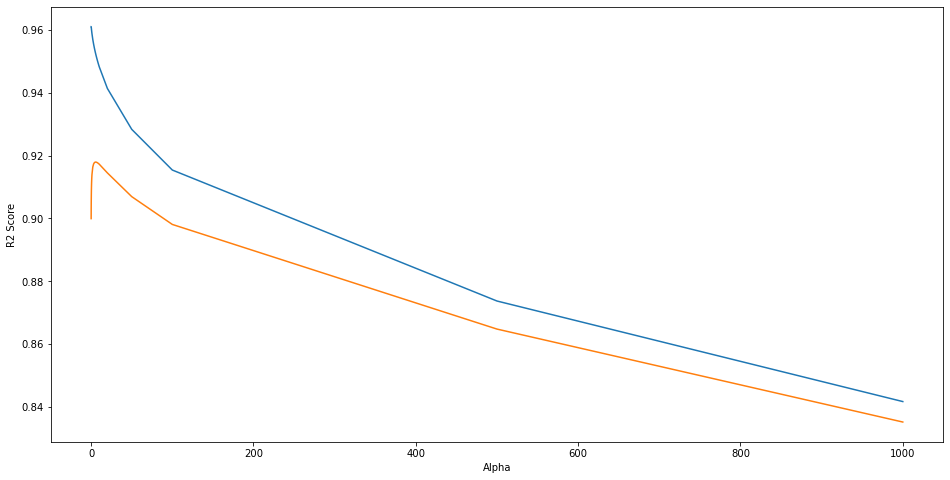

In [112]:

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('R2 Score')
plt.show()

In [113]:
model_RR.best_params_

{'alpha': 6.0}

In [114]:
ridge = Ridge(alpha = 6)
ridge.fit(X_train,Y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


### calculation of metrics such as R2 score, RSS and RMSE for Ridge

In [115]:
metric2 = []
r2_train_lr = r2_score(Y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9510203356874521
0.902447900917158
6.3862922688193615
5.383458589686543
0.0062488182669465375
0.012291001346316308


Text(0.5, 0, 'Errors')

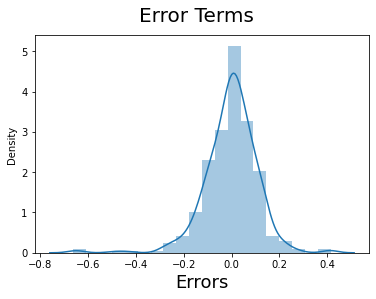

In [116]:
fig = plt.figure()
sns.distplot((Y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

Most of the values are populated at the centre (zero error) , looks fine.

Text(0.5, 0, 'Errors')

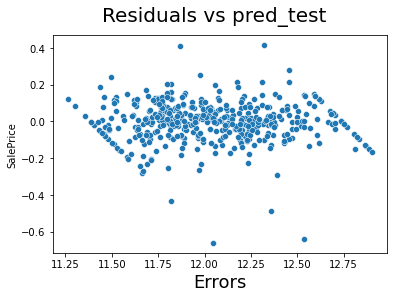

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(y_pred_test,(Y_test - y_pred_test))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

The residuals are scattered around '0'

In [118]:
main_coef1=pd.Series(ridge.coef_,index=X_train.columns)
var_selected1= sum(ridge.coef_!=0)
print("The number of feautures selected by Ridge :",var_selected1)

The number of feautures selected by Ridge : 276


In [119]:
#checking the model parameters
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [120]:
ridge_coef['Coef']=ridge_coef['Coef'].apply(lambda x:abs(x))

In [121]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,constant,11.755096
98,OverallQual_9,0.120000
8,GrLivArea,0.110271
107,OverallCond_9,0.106831
53,Neighborhood_Crawfor,0.091589
97,OverallQual_8,0.083691
25,MSSubClass_2-STORY PUD - 1946 & NEWER,0.072227
101,OverallCond_3,0.072034
54,Neighborhood_Edwards,0.070192
222,TotRmsAbvGrd_12,0.069508


In [122]:
ridge_coef.drop([0], axis=0, inplace=True)

The top 10 features of Ridge

In [123]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
98,OverallQual_9,0.120000
8,GrLivArea,0.110271
107,OverallCond_9,0.106831
53,Neighborhood_Crawfor,0.091589
97,OverallQual_8,0.083691
25,MSSubClass_2-STORY PUD - 1946 & NEWER,0.072227
101,OverallCond_3,0.072034
54,Neighborhood_Edwards,0.070192
222,TotRmsAbvGrd_12,0.069508
57,Neighborhood_MeadowV,0.068791


### Final Metric of Lasso and Ridge

In [124]:
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
s_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
s_metric = pd.DataFrame(s_table ,columns = ['Metric'] )
ls_metric = pd.Series(metric1, name = 'Lasso Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
final_metric = pd.concat([s_metric, ls_metric ,rg_metric], axis = 1)

final_metric

,Metric,Lasso Regression,Ridge Regression
0,R2 Score (Train),0.931264,0.951020
1,R2 Score (Test),0.893139,0.902448
2,RSS (Train),8.962307,6.386292
3,RSS (Test),5.897157,5.383459
4,MSE (Train),0.093645,0.079049
5,MSE (Test),0.116034,0.110865


In [125]:
##Prepare metric to compare Ridge and Lasso score
rcol1 = pd.DataFrame(index=X_train.columns)
rcol1['Ridge'] = ridge.coef_
rcol1['Lasso'] = lasso.coef_
rcol1.sort_values(by=['Lasso'], ascending=False).head(15)

,Ridge,Lasso
OverallQual_9,0.120000,0.165797
OverallQual_8,0.083691,0.120873
GrLivArea,0.110271,0.119575
Neighborhood_Crawfor,0.091589,0.098267
KitchenAbvGr_1,0.046972,0.083417
OverallCond_9,0.106831,0.076442
Neighborhood_Somerst,0.058532,0.066544
OverallQual_7,0.027857,0.060098
Functional_Typ,0.058070,0.055094
OverallCond_8,0.058400,0.050510


## Subjective Questions

#### Question 1

### Question 1: Double the values of Alpha for Ridge and Lasso
- Parameter for Ridge is 6.0
- Parameter for Lasso is 0.001
#### After doubling the values
- Parameter for Ridge is 12
- Parameter for Lasso is 0.002

## Lasso Regression

In [126]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,Y_train)
Y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=Y_train, y_pred=Y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=Y_test, y_pred=Y_test_pred)
print('R2_Score_Test: ', test1_r2)

R2_Score_Train:  0.9160452557082583
R2_Score_Test:  0.8753979629038001


In [127]:
rcol2 = pd.DataFrame(index=X_train.columns)
rcol2['Lasso'] = lasso.coef_
rcol2.sort_values(by=['Lasso'], ascending=False).head(10)

,Lasso
GrLivArea,0.125802
OverallQual_9,0.117208
OverallQual_8,0.103303
KitchenAbvGr_1,0.074362
Neighborhood_Crawfor,0.073919
OverallQual_7,0.054855
Functional_Typ,0.047504
TotalBsmtSF,0.046407
Condition1_Norm,0.040248
OverallCond_7,0.037979


## Ridge Regression

In [128]:
ridge = Ridge(alpha = 12)
ridge.fit(X_train,Y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

train1_rr = metrics.r2_score(y_true=Y_train, y_pred=y_pred_train)
print('R2_Score_Train: ', train1_rr)

test1_rr = metrics.r2_score(y_true=Y_test, y_pred=y_pred_test)
print('R2_Score_Test: ', test1_rr)


R2_Score_Train:  0.9461387801300578
R2_Score_Test:  0.9020579702078144


In [129]:
rcol3 = pd.DataFrame(index=X_train.columns)
rcol3['Ridge'] = ridge.coef_
rcol3.sort_values(by=['Ridge'], ascending=False).head(10)

,Ridge
GrLivArea,0.106216
OverallQual_9,0.098790
OverallQual_8,0.078595
Neighborhood_Crawfor,0.078375
OverallCond_9,0.076204
TotalBsmtSF,0.055413
Functional_Typ,0.051955
Neighborhood_Somerst,0.051840
OverallCond_8,0.050970
Condition1_Norm,0.046612


### Question 3

In [130]:
X_train = X_train.drop(['GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'OverallQual_9', 'KitchenAbvGr_1'], axis=1)

X_test = X_test.drop(['GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'OverallQual_9', 'KitchenAbvGr_1'], axis=1)

In [131]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_LR = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_LR.fit(X_train,Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

### Result of lasso regression

In [132]:
cv_results = pd.DataFrame(model_LR.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062904,0.012653,0.001296,0.002128,0.0001,{'alpha': 0.0001},0.900400,0.874218,0.874821,0.919255,0.920534,0.897846,0.020337,1,0.951764,0.954917,0.955981,0.947290,0.948787,0.951748,0.003365
1,0.017358,0.000503,0.006687,0.008190,0.001,{'alpha': 0.001},0.907119,0.867129,0.875038,0.908775,0.922045,0.896021,0.021157,2,0.917993,0.924599,0.922790,0.917546,0.917197,0.920025,0.003061
2,0.000000,0.000000,0.003354,0.006709,0.01,{'alpha': 0.01},0.847107,0.794005,0.800675,0.843347,0.871355,0.831298,0.029422,3,0.832982,0.849519,0.842404,0.837475,0.828707,0.838218,0.007262
3,0.010966,0.009122,0.000000,0.000000,0.05,{'alpha': 0.05},0.713528,0.706372,0.700262,0.726919,0.753082,0.720033,0.018759,4,0.720810,0.733719,0.738353,0.723662,0.711410,0.725591,0.009556
4,0.006675,0.008199,0.003554,0.006160,0.1,{'alpha': 0.1},0.519801,0.531372,0.541464,0.560101,0.572718,0.545091,0.019129,5,0.548707,0.551554,0.563566,0.557855,0.538381,0.552012,0.008539
5,0.013366,0.006711,0.003547,0.006608,0.2,{'alpha': 0.2},0.162323,0.158069,0.185074,0.174354,0.152414,0.166447,0.011778,6,0.184610,0.172066,0.182921,0.184910,0.149934,0.174888,0.013343
6,0.006873,0.008424,0.003540,0.007080,0.3,{'alpha': 0.3},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.006911,0.008468,0.003533,0.007067,0.4,{'alpha': 0.4},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.010487,0.008570,0.003564,0.006640,0.5,{'alpha': 0.5},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.007531,0.007638,0.004924,0.006672,0.6,{'alpha': 0.6},-0.011566,-0.006566,-0.000028,-0.013980,-0.008504,-0.008129,0.004780,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### R2 Score Vs Alpha of Test And Train Set

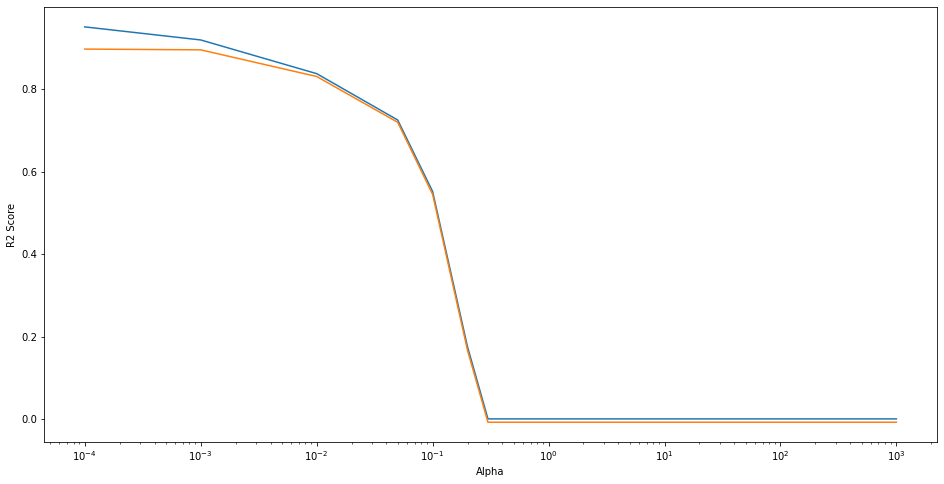

In [133]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [134]:
model_LR.best_params_

{'alpha': 0.0001}

In [135]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#building the model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,Y_train)
Y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

### calculation of metrics such as R2 score, RSS and RMSE for Lasso

In [136]:
metric1 = []
r2_train_lr = r2_score(Y_train, Y_train_pred)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_test_pred)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - Y_train_pred))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - Y_test_pred))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, Y_train_pred)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_test_pred)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9470485508642267
0.8899863836863182
6.904159817851966
6.071153294440371
0.006755537982242628
0.01386108058091409


Text(0.5, 0, 'Errors')

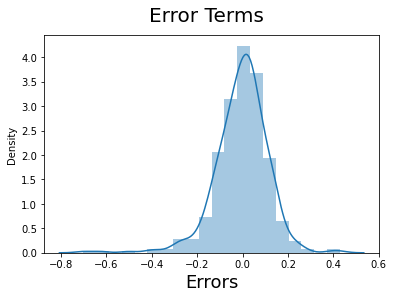

In [137]:
fig = plt.figure()
sns.distplot((Y_test - Y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

Most of the values are populated at the centre (zero error) , looks fine.

Text(0.5, 0, 'Errors')

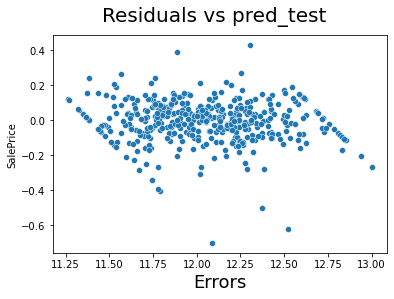

In [138]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(Y_test_pred,(Y_test - Y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

The residuals are scattered around '0'

In [139]:
#Coeff of Lasso
lasso.coef_

array([ 2.87692306e-02, -1.01399225e-04, -3.90567853e-03, -1.68157446e-03,
       -2.32204932e-02,  1.03730299e-01,  9.15500659e-02,  3.10408609e-02,
        1.16394775e-02,  7.28903783e-03,  0.00000000e+00,  5.91316292e-03,
        3.57325115e-03, -5.15514666e-02, -1.67943063e-02, -1.82968503e-02,
        3.01049973e-02,  5.29301829e-03, -0.00000000e+00, -2.33345160e-02,
        1.28602286e-02,  1.97473749e-02, -5.61039397e-02, -1.32739495e-01,
        8.65371966e-03, -0.00000000e+00,  0.00000000e+00,  6.92701828e-03,
        6.39046923e-02,  4.21413094e-02,  2.25158726e-02,  0.00000000e+00,
       -0.00000000e+00,  2.77775406e-02, -0.00000000e+00, -2.18670685e-04,
        7.40549603e-03,  1.27152560e-02, -6.09672667e-03,  2.37967485e-02,
        2.66348835e-02, -3.12541430e-02, -0.00000000e+00, -4.70812761e-03,
        4.42616724e-02,  2.31570315e-03, -0.00000000e+00, -6.63272637e-02,
       -1.54628603e-02,  3.07629811e-02, -3.76147581e-02, -1.24089732e-01,
       -2.00773825e-02, -

In [140]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("The number of feautures selected by lasso :",var_selected)

The number of feautures selected by lasso : 204


#### Lasso model parameters

In [141]:
# lasso model parameters
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [142]:
lasso_coef['Coef']=lasso_coef['Coef'].apply(lambda x:abs(x))

In [143]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,11.966106
103,OverallCond_9,0.225520
95,OverallQual_10,0.206878
264,SaleType_ConLD,0.187434
90,OverallQual_3,0.163975
55,Neighborhood_MeadowV,0.160367
91,OverallQual_4,0.157252
188,BsmtFullBath_3,0.146421
92,OverallQual_5,0.133669
24,MSSubClass_2-STORY PUD - 1946 & NEWER,0.132739


In [144]:
lasso_coef.drop([0], axis=0, inplace=True)

The top 10 features of Lasso

In [145]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
103,OverallCond_9,0.225520
95,OverallQual_10,0.206878
264,SaleType_ConLD,0.187434
90,OverallQual_3,0.163975
55,Neighborhood_MeadowV,0.160367
91,OverallQual_4,0.157252
188,BsmtFullBath_3,0.146421
92,OverallQual_5,0.133669
24,MSSubClass_2-STORY PUD - 1946 & NEWER,0.132739
52,Neighborhood_Edwards,0.124090
